<a href="https://colab.research.google.com/github/ShouvikSaha504/Customer-Segmentation-of-a-Banking-Financial-Services-/blob/main/Customer_Segmentation_of_Banking_%26_Financial_Services_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Title**:
####Customer Segmentation of a Banking & Financial Services company using credit card usage data.

###**Introduction**:

In the Banking & Financial Services industry, understanding customer behavior is crucial for developing targeted marketing strategies and improving customer satisfaction. This project aims to analyze credit card usage data to segment customers based on their spending patterns, payment behavior, and credit utilization. The insights gained from this analysis can help in upselling and cross-selling financial products such as savings plans and loans to targeted customer groups.

###**About Dataset:**
This dataset contains 8950 customer credit card usage data with 18 variables that depicts customer behavior. The variables of the dataset includes:

1. **Customer ID:** A unique identifier assigned to each customer.

2. **Balance:** The total balance on the credit card account.

3. **Balance Frequency:** The frequency with which the balance is updated, indicating how often the customer checks their balance.

4. **Purchases:** The total amount of purchases made using the credit card.

5. **One-off Purchases:** The amount spent on one-time purchases made using the credit card.

6. **Installment Purchases:** The amount spent on purchases paid in installments.

7. **Cash Advance:** The total amount of cash advances taken on the credit card.

8. **Purchases Frequency:** The frequency of purchases made using the credit card.

9. **One-off Purchases Frequency:** The frequency of one-time purchases made using the credit card.

10. **Purchases Installments Frequency:** The frequency of installment purchases made using the credit card.

11. **Cash Advance Frequency:** The frequency of cash advances taken on the credit card.

12. **Cash Advance TRX:** The number of transactions involving cash advances.

13. **Purchases TRX:** The number of purchase transactions made using the credit card.

14. **Credit Limit:** The maximum amount of credit available on the credit card.

15. **Payments:** The total amount of payments made towards the credit card balance.

16. **Minimum Payments:** The total amount of minimum payments made towards the credit card balance.

17. **PRC Full Payment:** The percentage of months where the customer paid the full balance.

18. **Tenure:** The number of months the customer has been using the credit card.

These columns provide comprehensive data on the customers' credit card usage and financial behavior, useful for customer segmentation and analysis.


###**Algorithm used:**
For this case study we used k-means clustering technique to segmnet clustering into different groups. As this is a unsupervised lerning project we will use k-means clustering which is a popular clustering algorithm used to partition the dataset into k distinct groups or clusters.

### **Steps of the project:**
For this project we followed 5 steps:
1. Define the problem statement
2. Data Collection
3. Data Preprocessing
4. Exploratory Data Analysis (EDA)
5. Model Selection, Training & Evaluation


### **Problem Statement:**
Segment Customers based on credit card usage behavior to optimize product recommendations and improve cross-selling and upselling strategies.

#####**Objective:**
In this case study we will segment customers based on their credit card usage data for upselling and and cross selling financial products like Savings Plans, Loans, and Retirement plans, e.t.c on targeted customer groups.

###**Data Collection:**
#### Dataset Link: https://drive.google.com/file/d/1betPv9wgE4aC-EhbKKcE3ig1RW7iVXg4/view?usp=sharing

### **Data Preprocessing**
#### **Importing the libraries**

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
from numpy import math

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import KernelPCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-c1d24d52178c>:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


####**Load Dataset**

In [ ]:
# Loading the dataset
import pandas as pd
cluster_df = pd.read_csv("/content/Customer Data.csv")

In [ ]:
# First 5 rows
cluster_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Last 5 rows
cluster_df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


####**Data Exploration**

In [ ]:
# number of records present
len(cluster_df)

8950

In [ ]:
# shape of the dataset
cluster_df.shape

(8950, 18)

In [ ]:
# columns in the dataset
cluster_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

**Summary:**  The shape of our dataset is (8950, 18) which indicates the dataset has 8950 records and 18 columns.

In [ ]:
# check the datatypes of the columns
cluster_df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [ ]:
# check information of the dataset
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# Check null values
cluster_df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# description of the dataset
cluster_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Summary:**

* The dataset contains some null values in the Minimum Payments and Credit Limit columns. Since this is a credit card usage dataset, it does not include any negative values, as such values could lead to misinterpretation of the data.

* The distribution of Balance, Purchases, Oneoff Purchases, Installment purchases, Cash Advance, Credit Limit, Payments, and Minimum Payments looks to be skewed as there's a huge difference between the 75th percentile and the maximum value.


In [ ]:
# Check Duplicate values
cluster_df.duplicated().sum()

0



**Summary:**

*   The dataset contains no duplicate values.
*   Minimum Payments contains 313 null values and Credit limit column contains 1 null value. So, we will impute the null values from Credit Limit and Minimum Payments column with median as these columns might have outliers.






####**Handle Null Values**

In [ ]:
# Replace Null values with median.
impute_cols = ['MINIMUM_PAYMENTS', "CREDIT_LIMIT"]
median_imputer = SimpleImputer(strategy = 'median')
cluster_df[impute_cols] = median_imputer.fit_transform(cluster_df[impute_cols])

In [ ]:
# Check for Null Values
cluster_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# check the shape of the dataset
cluster_df.shape

(8950, 18)



**Summary:** We have imputed Null values from CREDIT_LIMIT column and  MINIMUM_PAYMENTS column with median.




In [ ]:
# description of the dataset
cluster_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### **Exploratory Data Analysis**

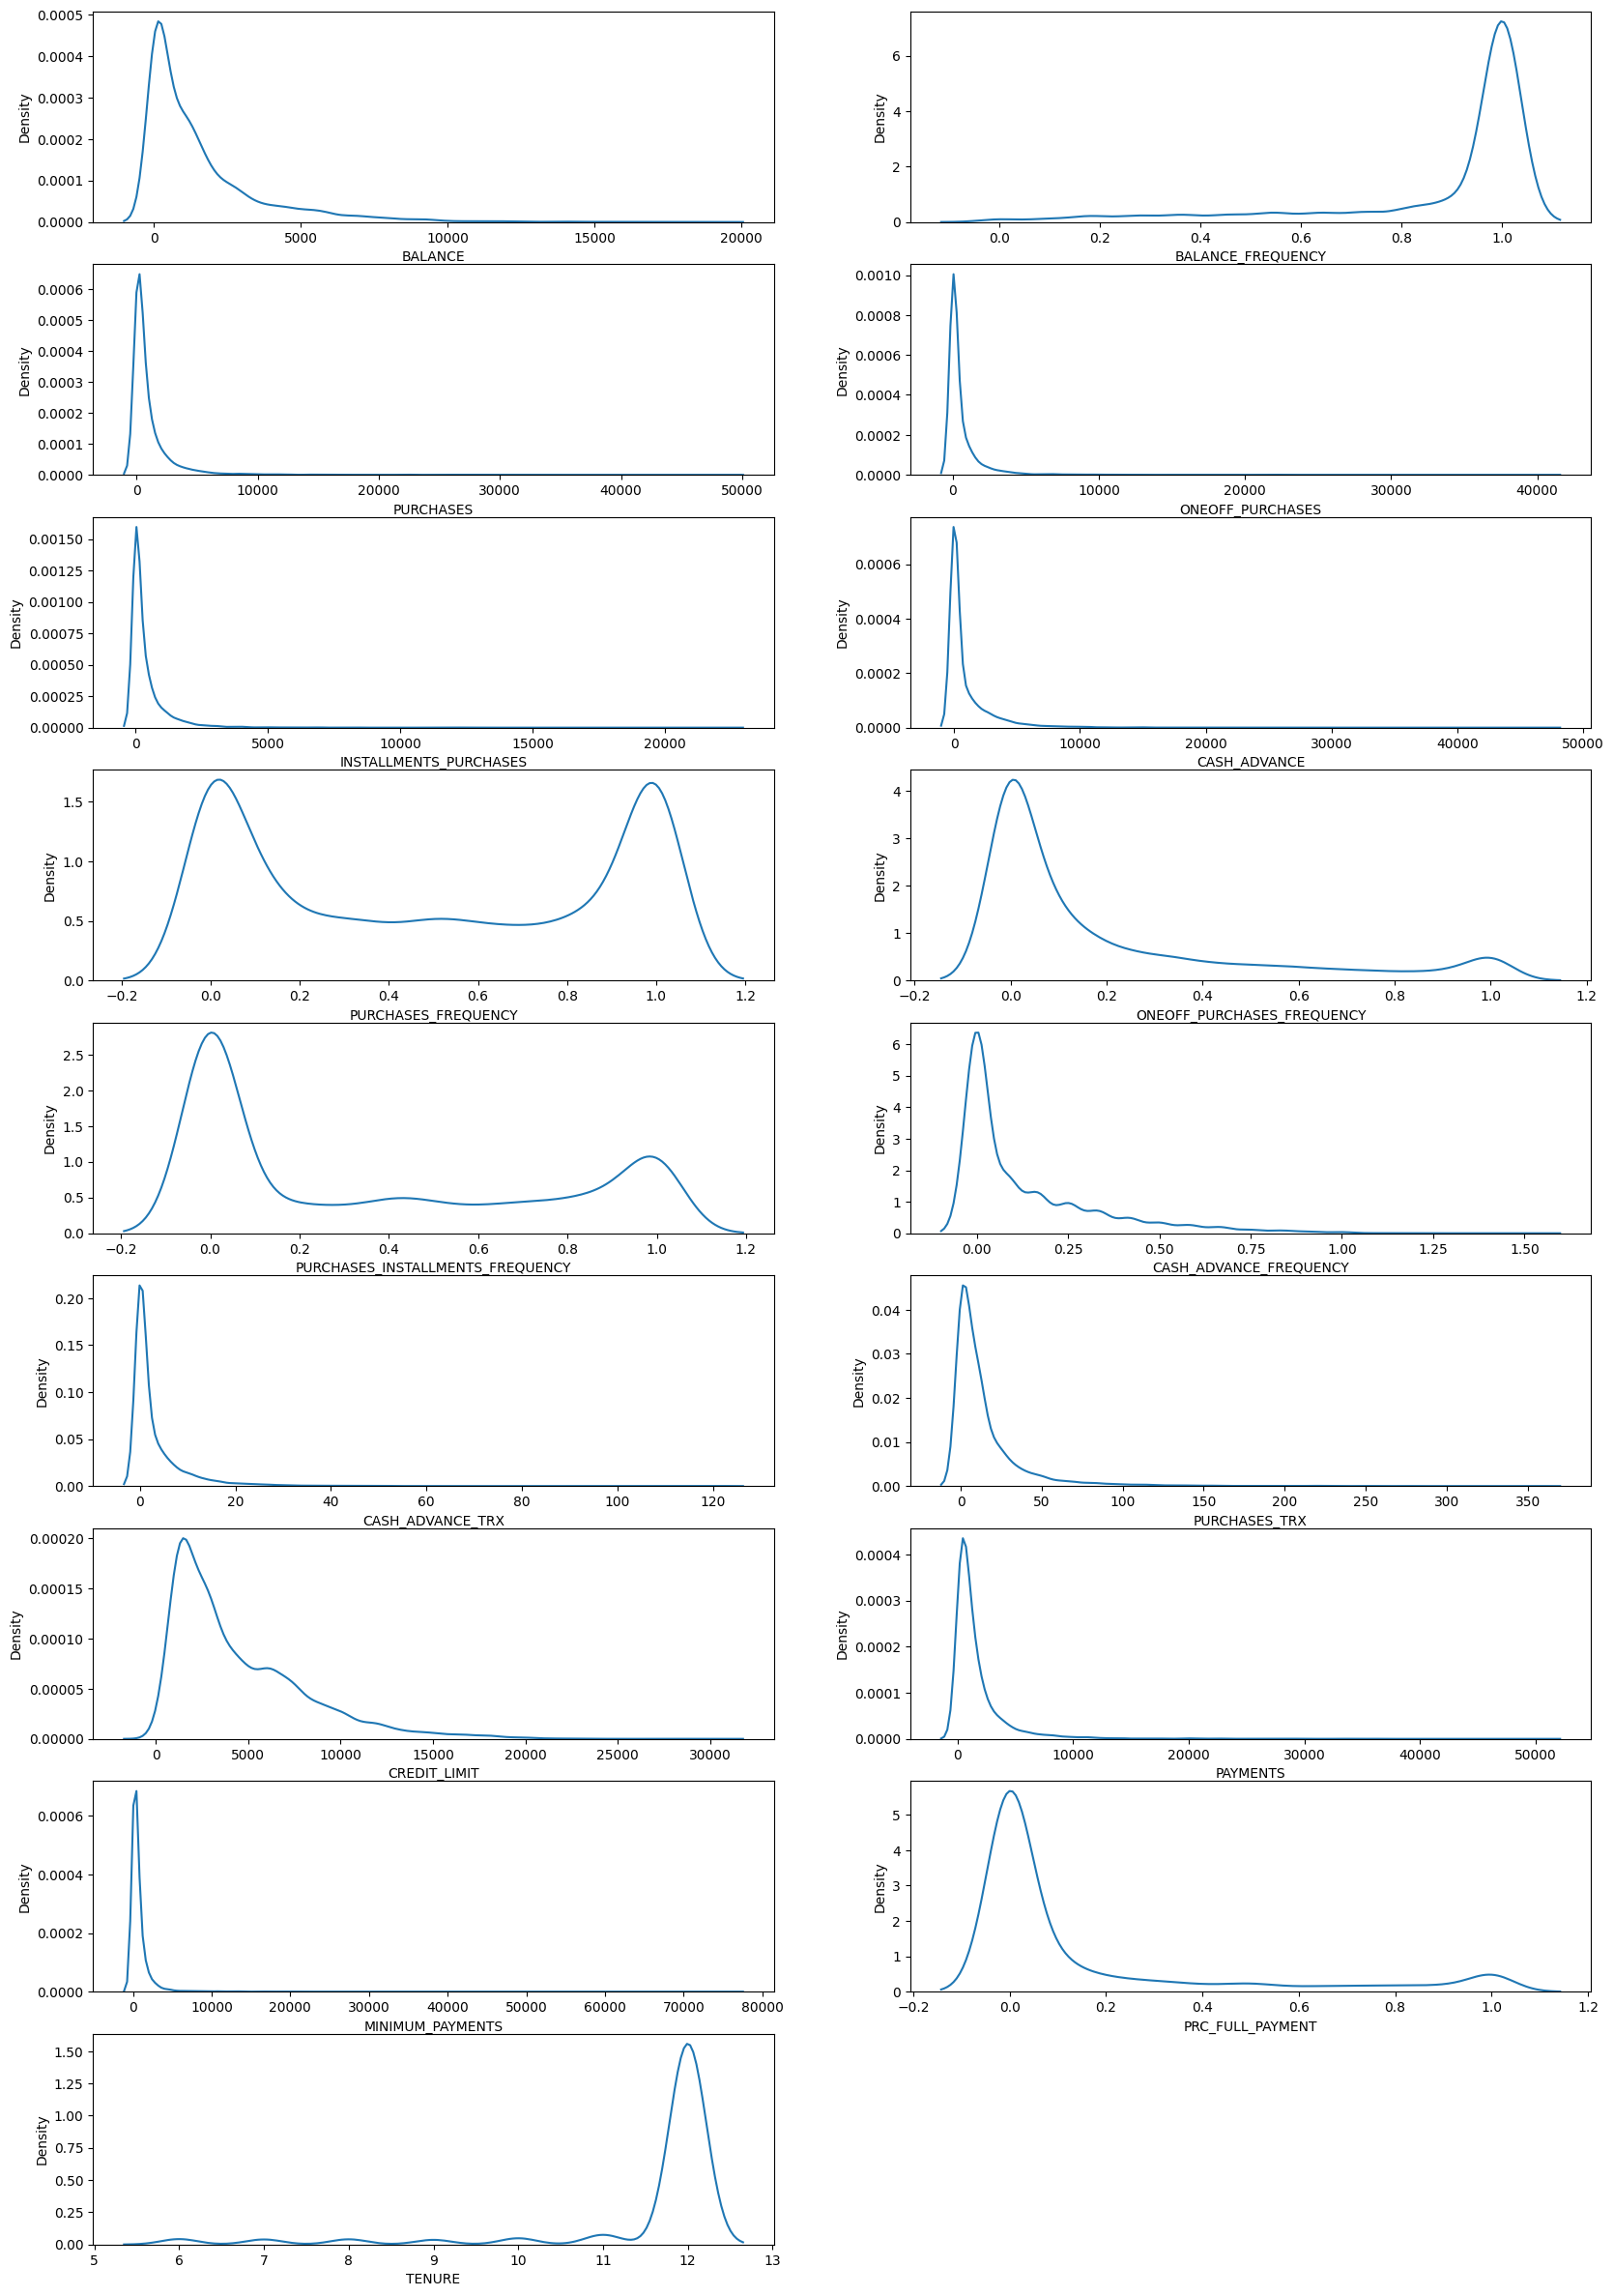

In [ ]:
# kde plot for data distribution analysis
new_df = cluster_df.drop('CUST_ID', axis = 1)
plt.figure(figsize = (20, 30))
for i, cols in enumerate(new_df.columns):
   plt.subplot(9, 2, i+1)
   sns.kdeplot(new_df[cols])
   plt.xlabel(cols)

plt.show()


**Sumamry**


*   We created a new data frame new_df by dropping the Customer ID column from the original dataframe as all the values in Customer ID column are unique and have no effect on creating clusters.
*   From the kde plots we can understand the dataset is not normally distributed. All the columns in the dataset are skewed which indicates that our dataset has a lot of outliers.



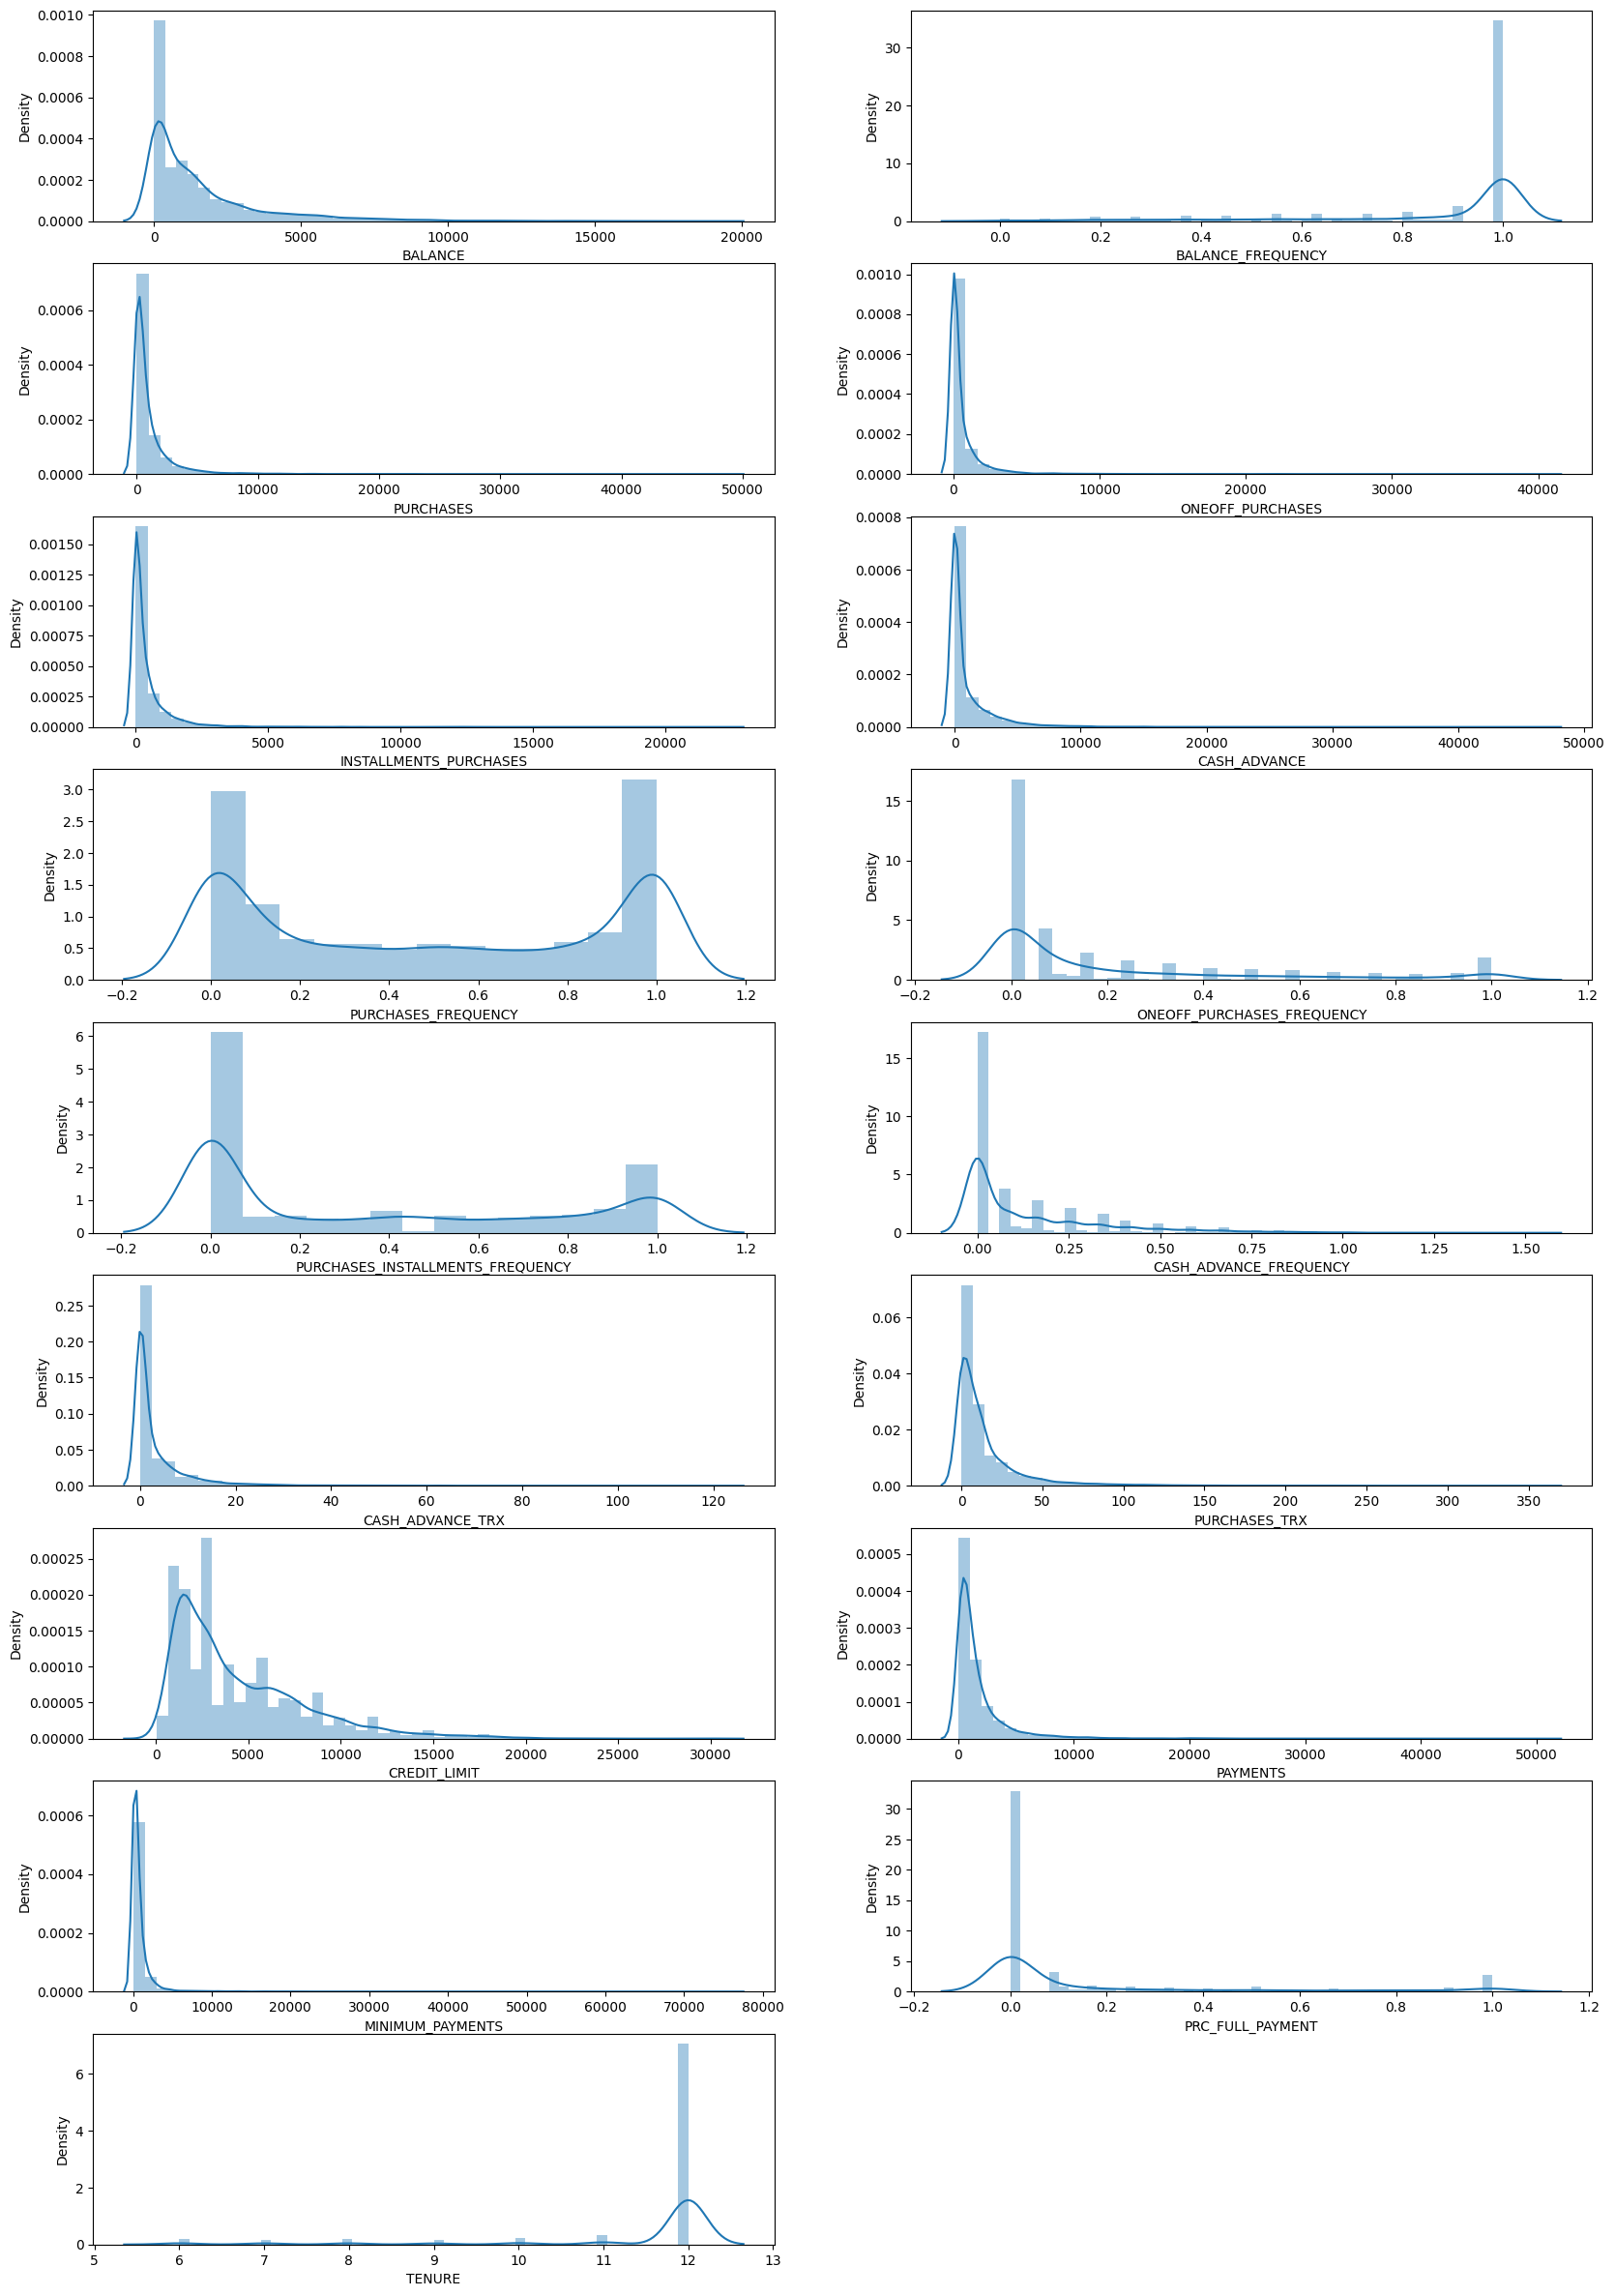

In [ ]:
# Distribution plot for data distribution analysis

plt.figure(figsize = (20, 30))
for i, cols in enumerate(new_df.columns):
   plt.subplot(9, 2, i+1)
   sns.distplot(new_df[cols])
   plt.xlabel(cols)

plt.show()

**Summary:**

* The distribution of all the variables are heavily left skewed.

* We will apply log transformation on these variables to make it less skewed.



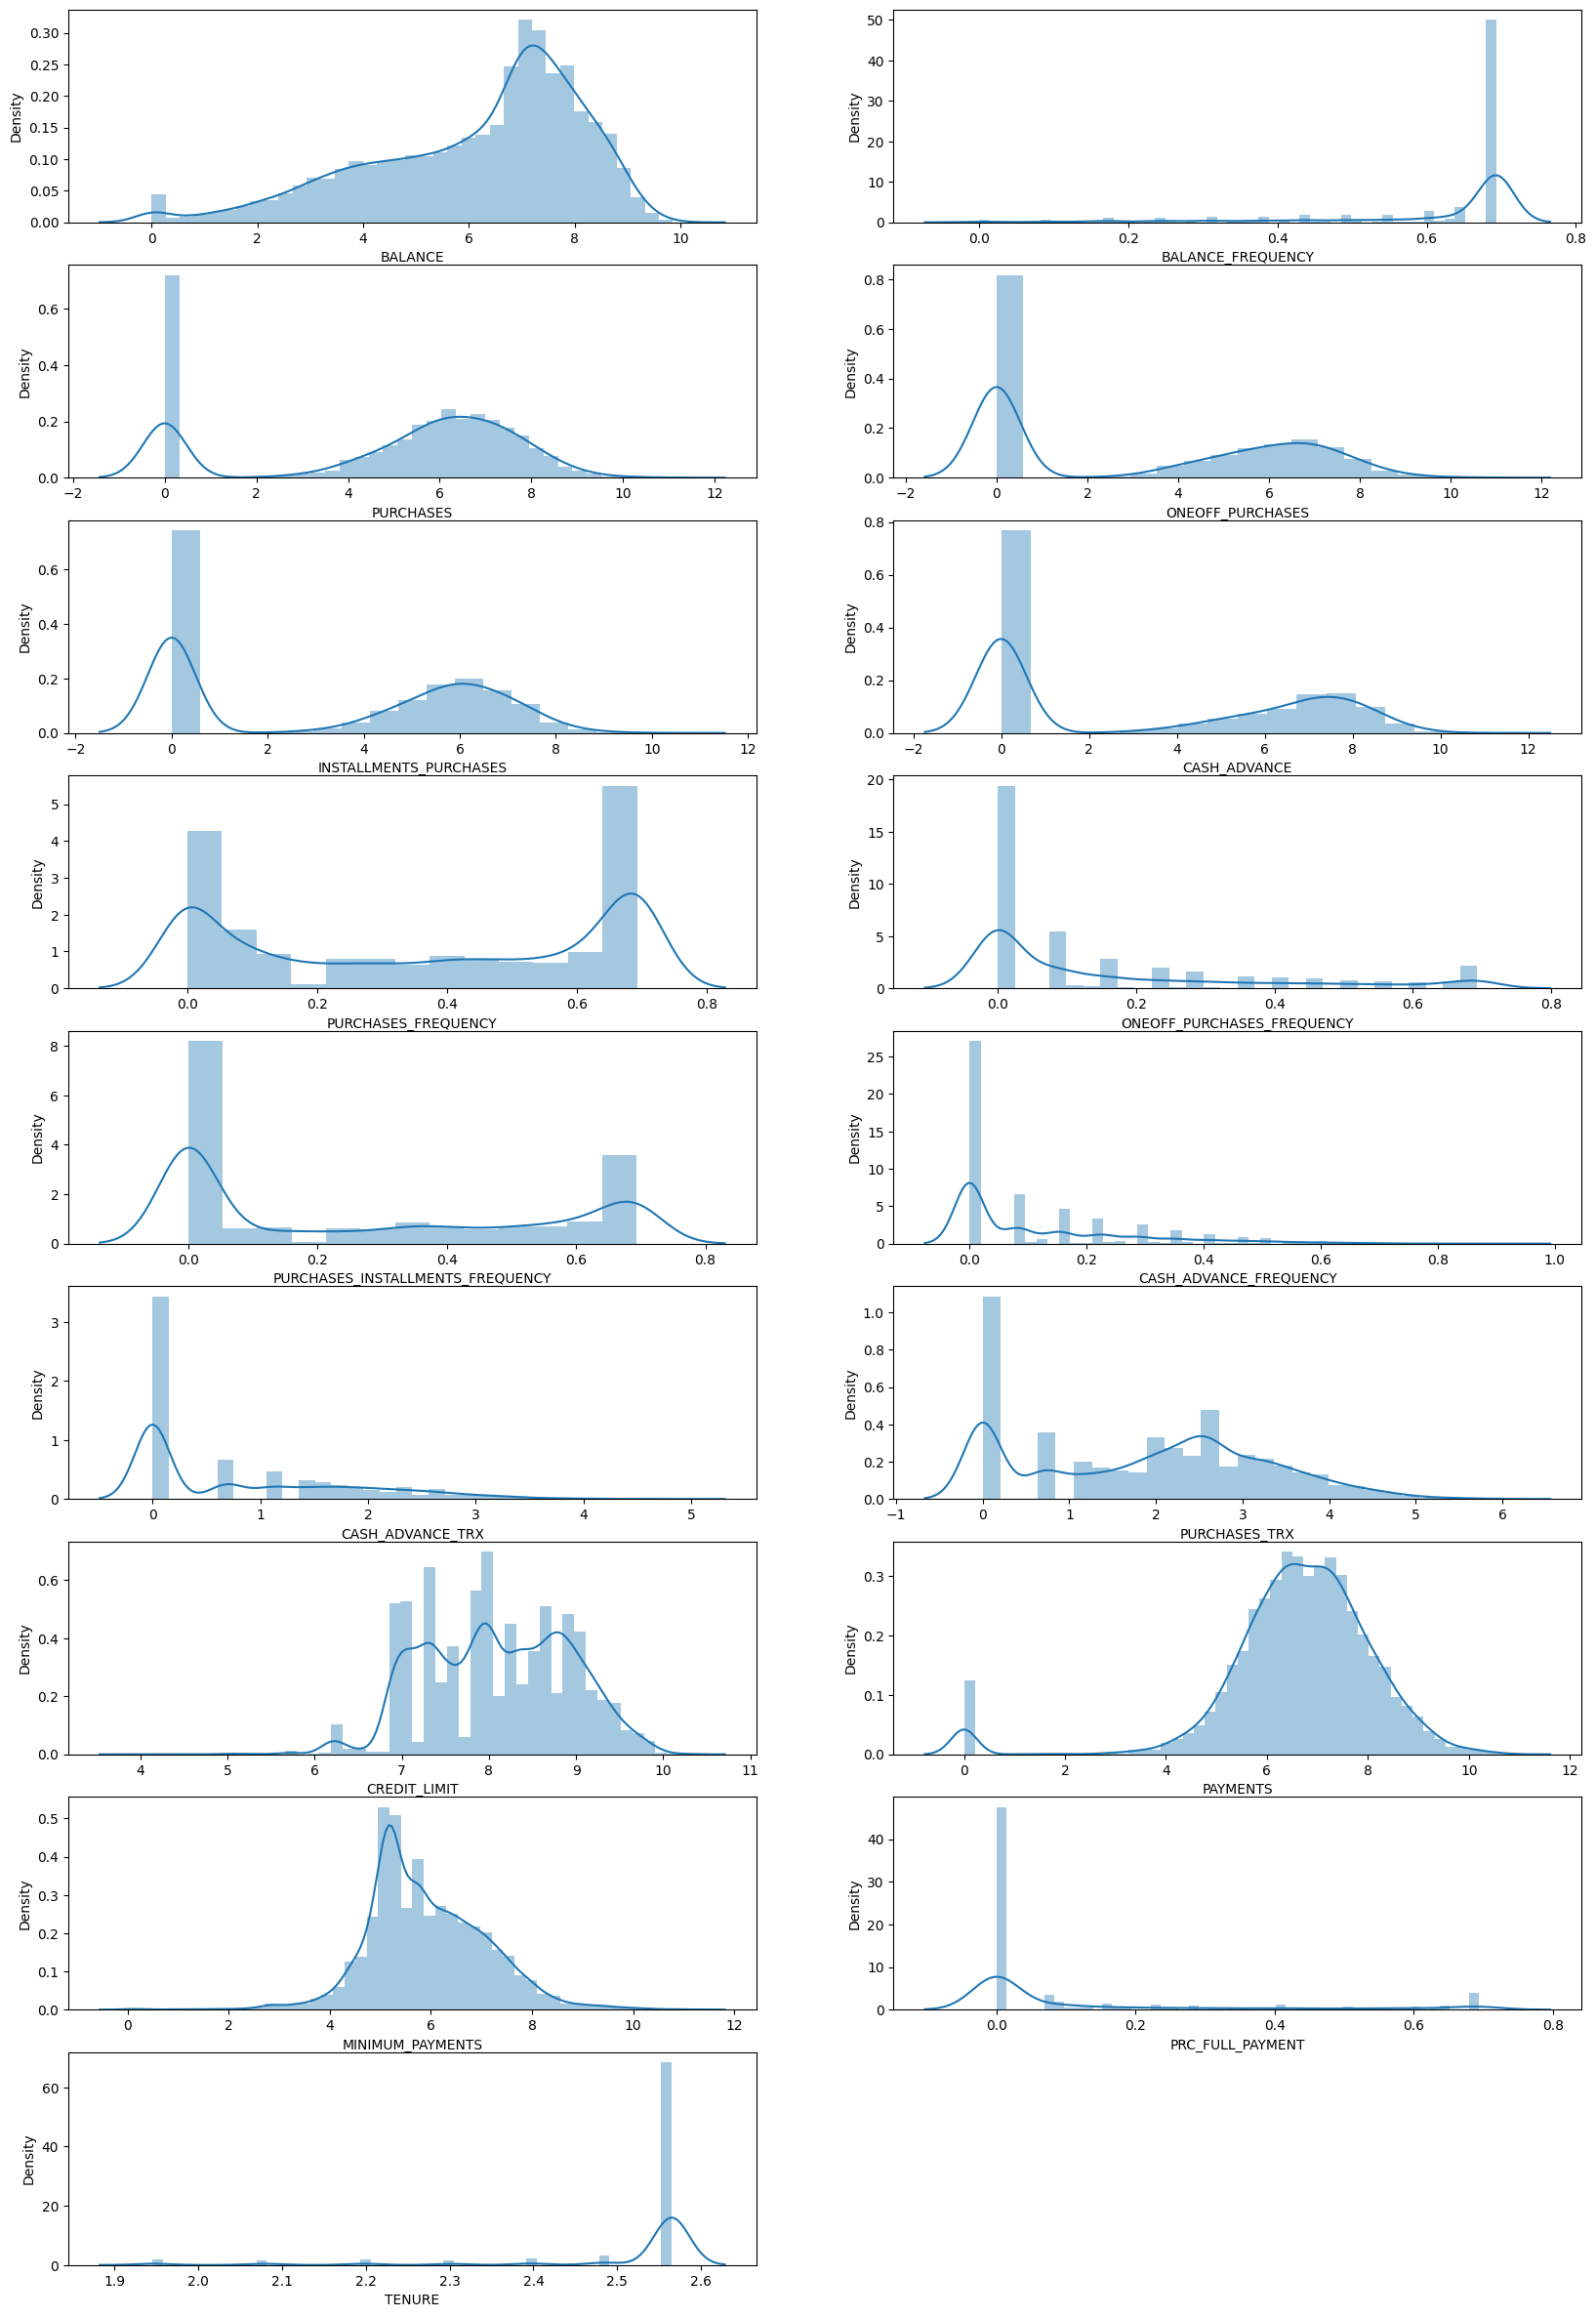

In [ ]:
# Log Transformation
plt.figure(figsize = (20, 30))
for i, cols in enumerate(new_df.columns):
   plt.subplot(9, 2, i+1)
   sns.distplot(np.log1p(new_df[cols]))
   plt.xlabel(cols)

plt.show()

**Summary:**
After applying log transformation we can observe the data distribution is less skewed and more normally distributed. Normally distributed data is preferrable for Machine Learning Model.





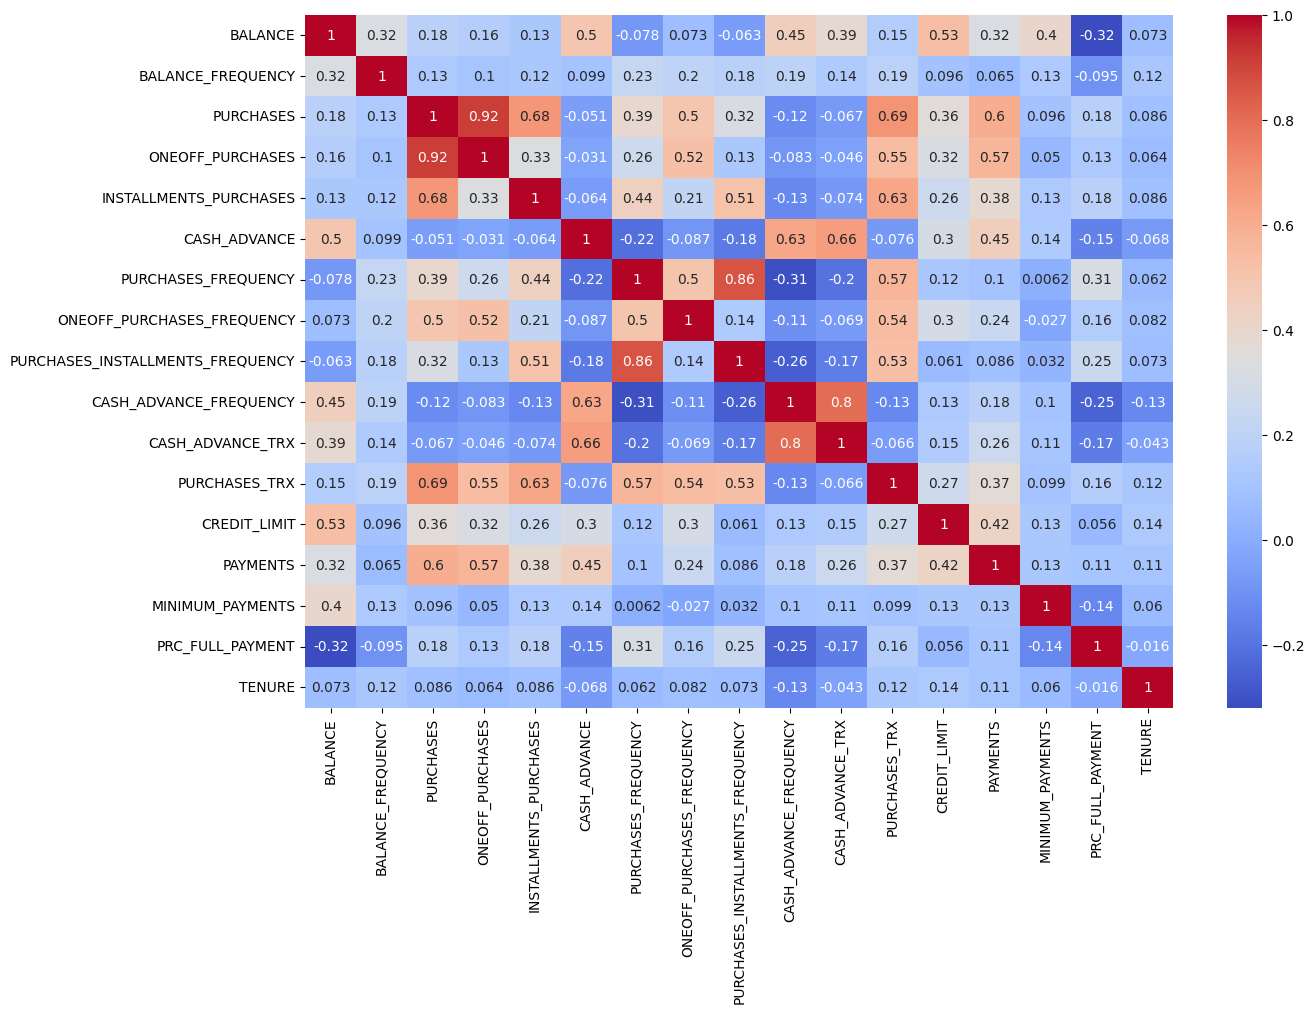

In [ ]:
# Heatmap
plt.figure(figsize = (14, 9))
sns.heatmap(new_df.corr(), annot = True, cmap = 'coolwarm')
plt.show()



**Summary:** Here we have created a heatmap to understand the linear correlation between the variables. The red color represents positive correlation and the blue color represents negative correlation.




In [ ]:
# Number of unique customers
cluster_df['CUST_ID'].nunique()

8950



**Summary:** All the customers in the dataset are unique customers.




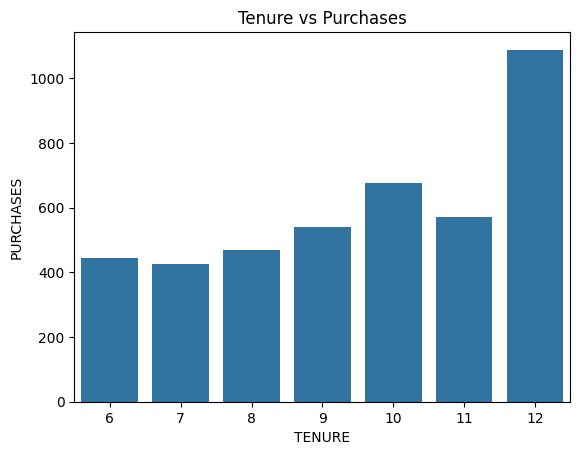

In [ ]:
# Plot the relation between Tenure and Minimum Payments
sns.barplot(x='TENURE', y='PURCHASES', data=cluster_df, ci = None)
plt.title('Tenure vs Purchases')
plt.show()

**Summary:** From the above plot we can observe that the long-term customers have higher Purchase amount through credit card, and the new customers have lower purchase amount through credit card. It indicates that the long-term customers are mostly loyal to the company and use the company's credit card for their purchases.

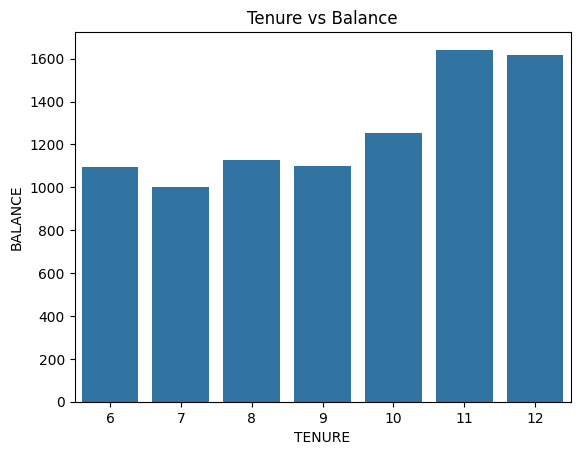

In [ ]:
# Plot the relation between Tenure and Balance
sns.barplot(x='TENURE', y='BALANCE', data=cluster_df, ci = None)
plt.title('Tenure vs Balance')
plt.show()



**Summary:** From the above plot we can observe that the long-term customers have a higher balance amount, and the new customers have a lower balance. The data suggests that long-term customers are generally more financially stable and less likely to default on their credit card payments.




In [ ]:
# Create a new data frame from cluster_df sorted by Balance in descending order
cluster_new = cluster_df.sort_values(by = 'BALANCE', ascending = False)

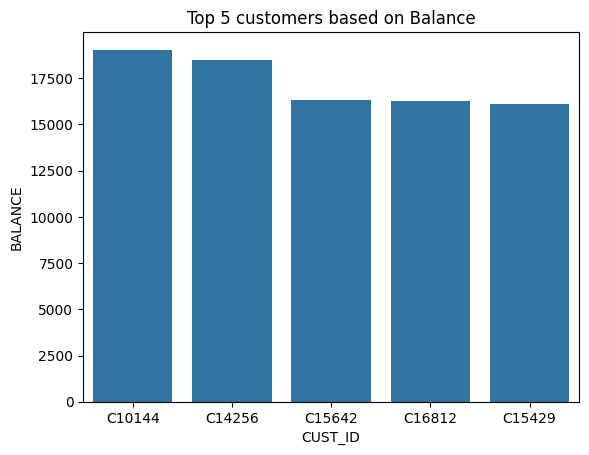

In [ ]:
# Top 5 Customers based on Balance
sns.barplot(x='CUST_ID', y='BALANCE', data=cluster_new[:5])
plt.title('Top 5 customers based on Balance')
plt.show()

**Summary**: From the above plot we can observe the top 5 customers in the dataset.

In [ ]:
cluster_df['TENURE'].value_counts().reset_index()

,TENURE,count
0,12,7584
1,11,365
2,10,236
3,6,204
4,8,196
5,7,190
6,9,175


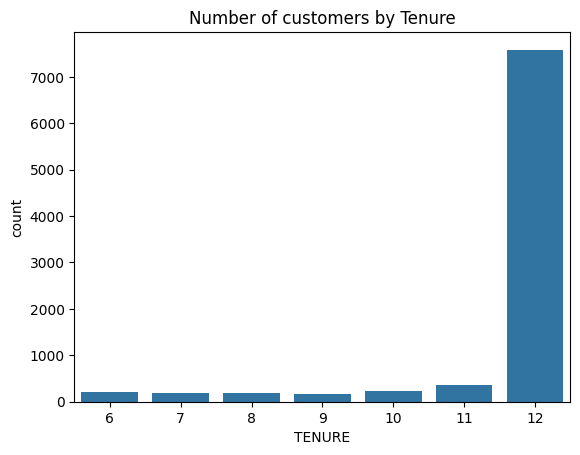

In [ ]:
# Plot number of customers by Tenure
sns.barplot(x='TENURE', y='count', data=cluster_df['TENURE'].value_counts().reset_index())
plt.title('Number of customers by Tenure')
plt.show()



**Summary:**  From the above plot we can observe most of the customers of the company having tenure 12 months, which are the most loyal customers to the company.




#### **Detect outliers**

In [ ]:
# Check outliers
# IQR outlier detection
q1 = new_df.quantile(0.25)
q3 = new_df.quantile(0.75)

iqr = q3 - q1

lw = q1 - 1.5 * iqr
uw = q3 + 1.5 * iqr

outlier_iqr = new_df[((new_df < lw) | (new_df > uw)).any(axis = 1)]
no_outlier_iqr = new_df[((new_df >= lw) & (new_df <= uw)).all(axis = 1)]

outlier_iqr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
len(outlier_iqr)

5964

In [ ]:
len(no_outlier_iqr)

2986


**Sumamry:**

*   Here we have used IQR method to detect outliers. Any data points above upper whisker or below lower whisker are outliers.
*   In the dataset, a significant portion of the data points are outliers. Due to their substantial number, we cannot dismiss them as mere outliers.







### **Feature Engineering**

#### **Apply Variance Inflation factor**


VIF is used to detect Multicollinearity among variables and columns having very low variance.



In [ ]:
# Apply VIF
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = new_df.columns

    # Calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(new_df.values, i) for i in range(len(dataframe.columns))]
    return vif_data

vif_sample_df = calculate_vif(new_df)

vif_sample_df

,feature,VIF
0,BALANCE,4.108714
1,BALANCE_FREQUENCY,18.108278
2,PURCHASES,58773.751426
3,ONEOFF_PURCHASES,32776.831050
4,INSTALLMENTS_PURCHASES,10399.626093
5,CASH_ADVANCE,3.461101
6,PURCHASES_FREQUENCY,26.445731
7,ONEOFF_PURCHASES_FREQUENCY,5.712731
8,PURCHASES_INSTALLMENTS_FREQUENCY,17.329860
9,CASH_ADVANCE_FREQUENCY,4.913554


In [ ]:
# Store the variables with low VIF
new_vif = vif_sample_df[vif_sample_df["VIF"] <= 5]
new_vif

,feature,VIF
0,BALANCE,4.108714
5,CASH_ADVANCE,3.461101
9,CASH_ADVANCE_FREQUENCY,4.913554
10,CASH_ADVANCE_TRX,3.880254
11,PURCHASES_TRX,4.248655
12,CREDIT_LIMIT,4.631292
13,PAYMENTS,3.596831
14,MINIMUM_PAYMENTS,1.406258
15,PRC_FULL_PAYMENT,1.694837


**Summary:** We have detected the variables with high VIF (>5), and removed them.


   - A VIF of 1 means that the predictor is not correlated with other variables.
   - A VIF between 1 and 5 typically indicates moderate correlation, but it's often not severe enough to require attention.
   - A VIF above 5 or 10 (thresholds can vary based on the field of study) suggests high correlation that may be problematic.

Hence we kept only those variables having VIF less than 5. VIF can be useful to remove variables which are not independent and have very low contirbution to the prediction.

In [ ]:
# Keep only the columns with low VIF in original dataframe
new_df = new_df[new_vif["feature"].values]
new_df.head()

,BALANCE,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,6442.945483,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,205.788017,0.083333,1,1,7500.0,0.000000,312.343947,0.000000
4,817.714335,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


#### **Scaling the data**

In [ ]:
# Apply Standard Scaling

scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)

scaled_df = pd.DataFrame(scaled_data, columns = new_df.columns)

scaled_df.head()

,BALANCE,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-0.731989,-0.466786,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551
1,0.786961,2.605605,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227
2,0.447135,-0.466786,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551
3,0.049099,-0.368653,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551
4,-0.358775,-0.466786,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551


**Summary:** By using Standard Scaler we scaled the data. It is recommended to scale the data before passing it to ML algorithm. If data is not scaled properly then model will give more importance to those variables having higher magnitude.

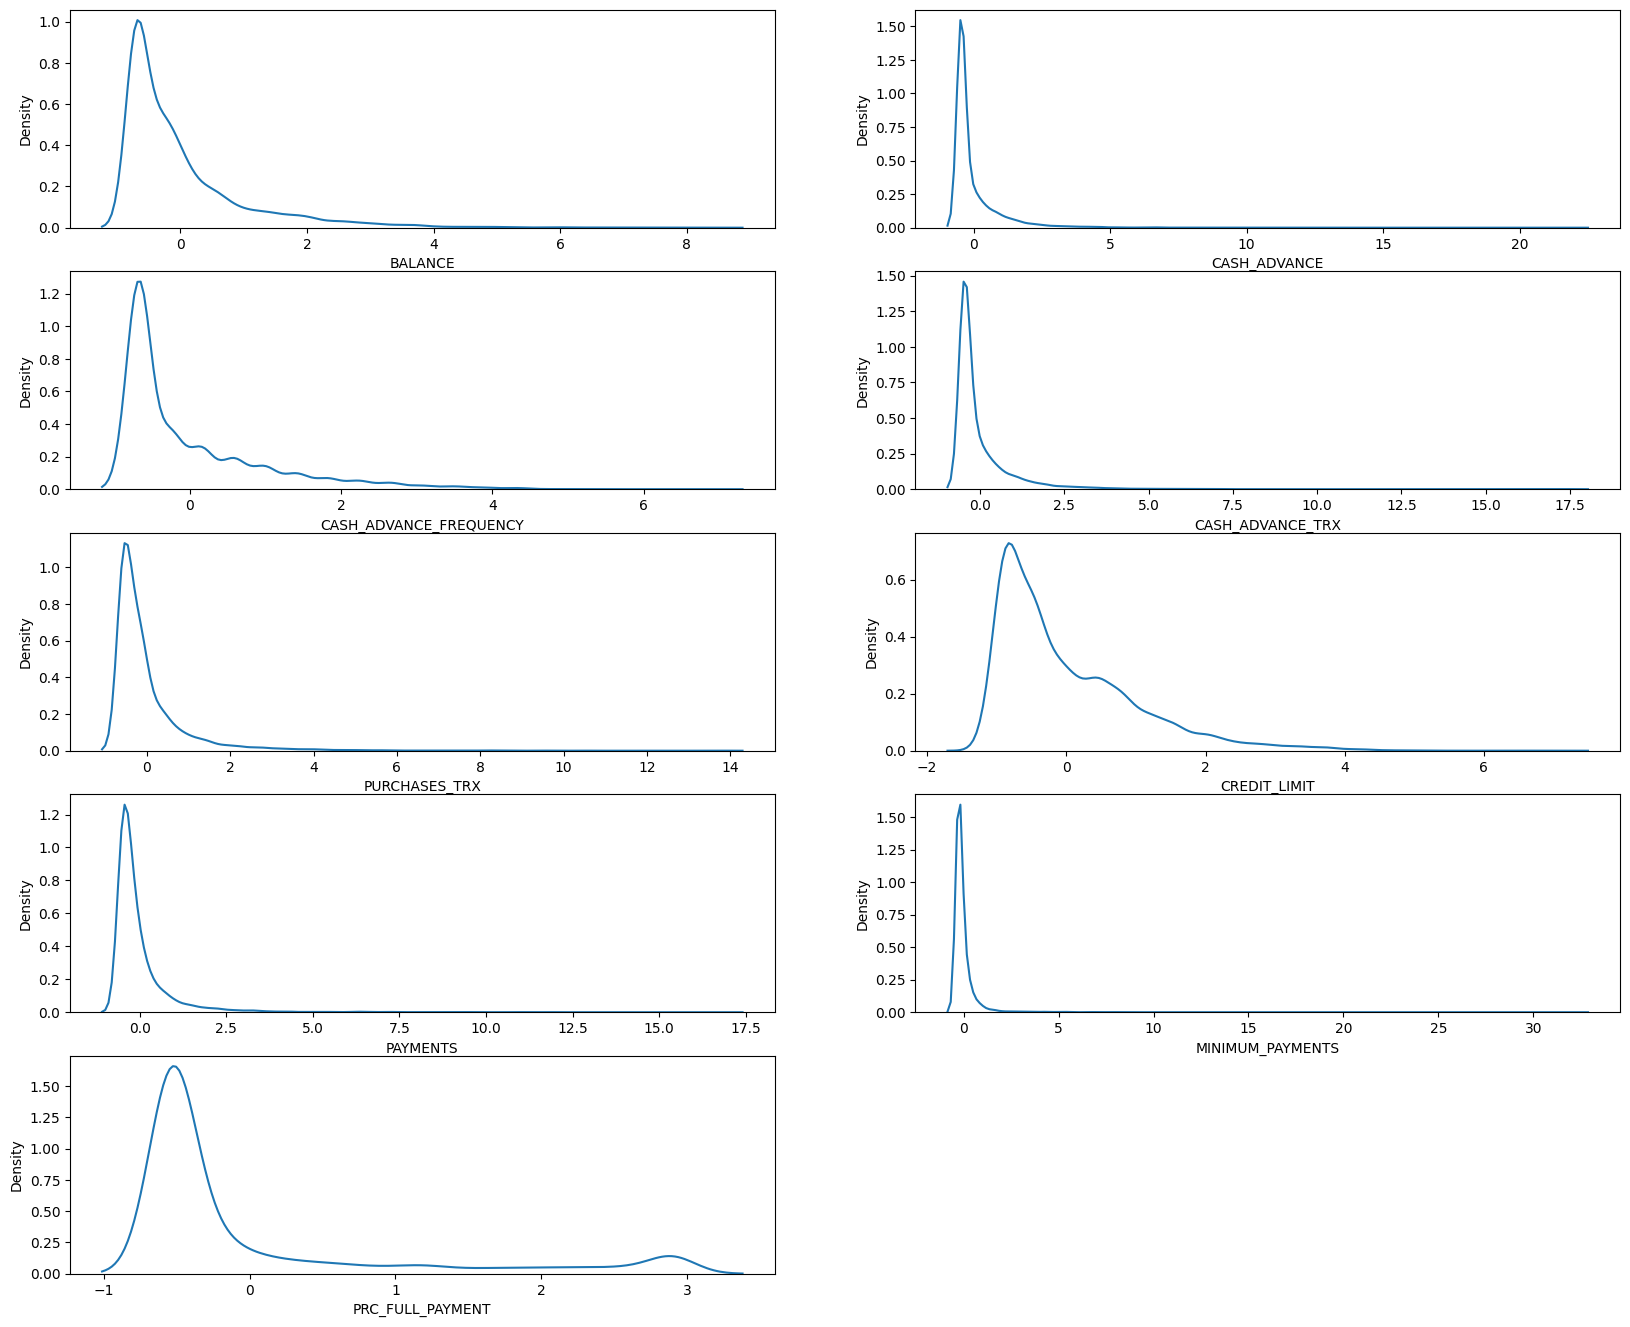

In [ ]:
# Use kernel density plot to visulaize the distribution after scaling
plt.figure(figsize = (20, 30))
for i, cols in enumerate(scaled_df.columns):
   plt.subplot(9, 2, i+1)
   sns.kdeplot((scaled_df[cols]))
   plt.xlabel(cols)

plt.show()

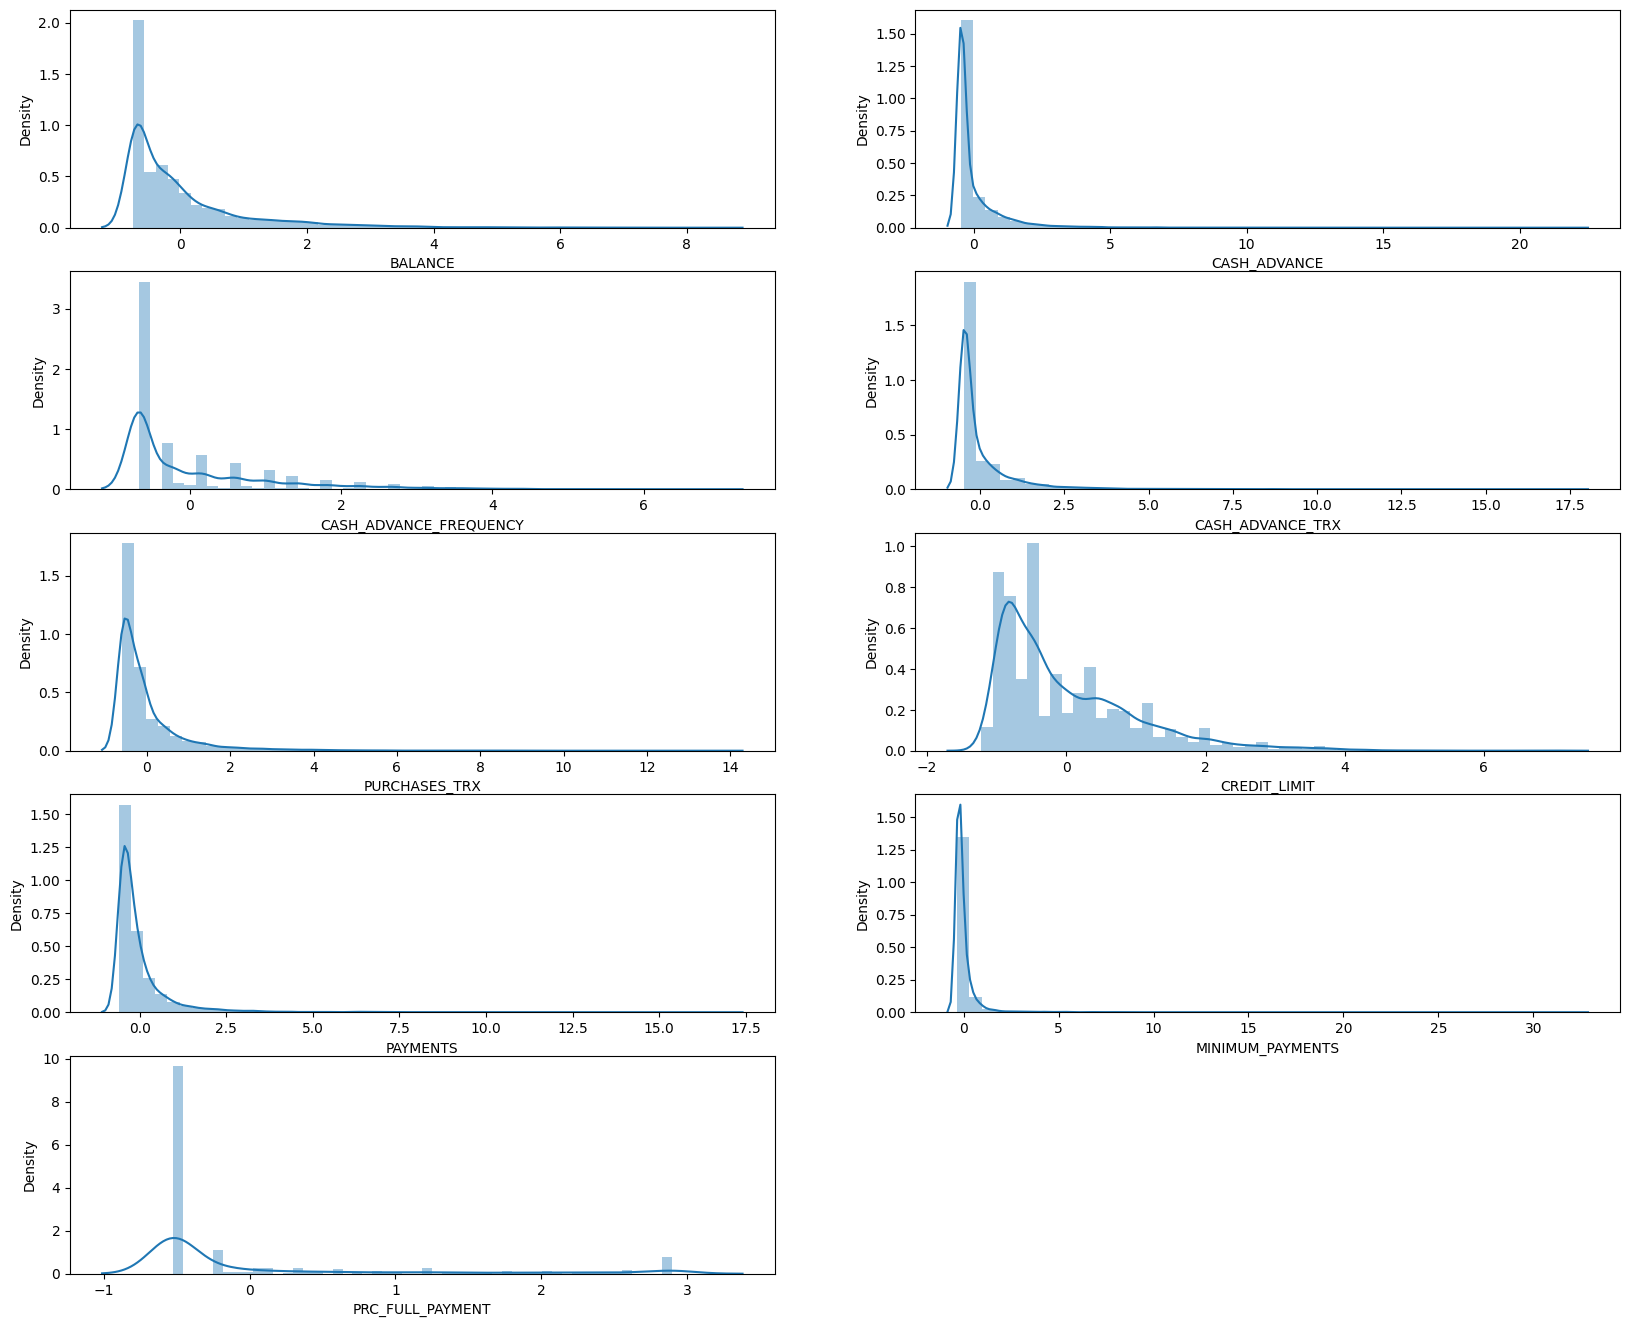

In [ ]:
# Use distirbution plot to visualize the scaled data
plt.figure(figsize = (20, 30))
for i, cols in enumerate(scaled_df.columns):
   plt.subplot(9, 2, i+1)
   sns.distplot(scaled_df[cols])
   plt.xlabel(cols)

plt.show()

#### **Apply log transformation:**

In [ ]:
# Check for negative value
new_df.min().min()

0.0

In [ ]:
# Apply log transformation
if (scaled_df <0).any().any():
    scaled_df = scaled_df - scaled_df.min().min()
scaled_df = np.log1p(scaled_df)
scaled_df.head()

,BALANCE,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,0.398434,0.562294,0.435755,0.556989,0.536579,0.231985,0.526207,0.651845,0.528230
1,1.101422,1.574242,1.027990,0.846535,0.488386,1.068207,1.111897,0.841127,0.898414
2,0.981559,0.562294,0.435755,0.556989,0.747853,1.114347,0.608501,0.755270,0.528230
3,0.820035,0.616712,0.674253,0.637605,0.512772,1.114347,0.484147,0.689727,0.528230
4,0.622029,0.562294,0.435755,0.556989,0.512772,0.274649,0.619022,0.675091,0.528230


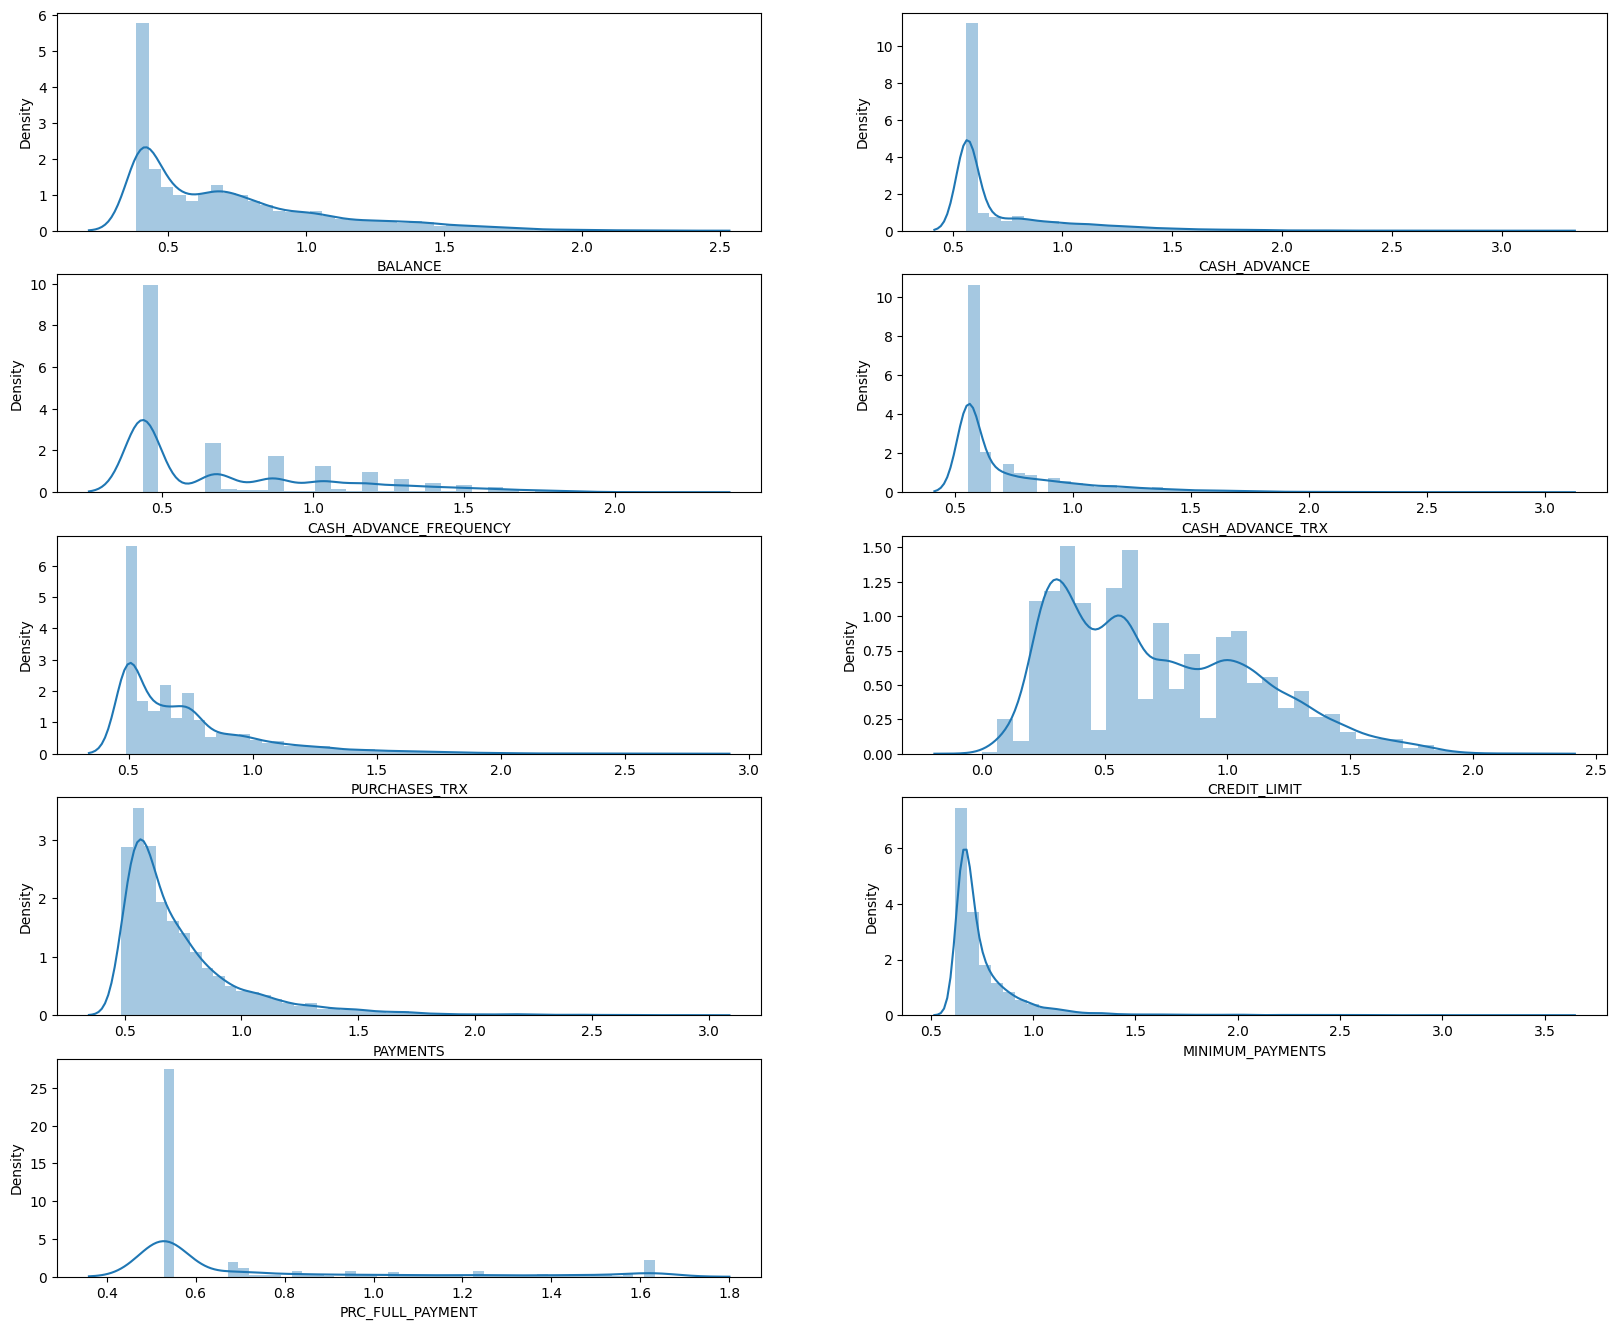

In [ ]:
# Visualize after applying log transformation
plt.figure(figsize = (20, 30))
for i, cols in enumerate(scaled_df.columns):
   plt.subplot(9, 2, i+1)
   sns.distplot(scaled_df[cols])
   plt.xlabel(cols)

plt.show()

**Summary**:
1. We shift all the negative values in the data set o positive direction to handle negative values before applying log transformation.
2. From the above distribution plot we can conclude that our data is mostly normally distributed now after applying log transformation. We have removed Skewness and kurtosis from the data.

####Principal Component Analysis

In [ ]:
# Check the column names in the data
scaled_df.columns

Index(['BALANCE', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
       'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
       'PRC_FULL_PAYMENT'],
      dtype='object')

In [ ]:
from sklearn.decomposition import PCA
# Applying PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Convert PCA components to a DataFrame for better readability
pca_df = pd.DataFrame(data=pca_data, columns=[f"PC{i + 1}" for i in range(len(scaled_df.columns))])

# Display the first few rows of the PCA components
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.461854,-0.823632,0.275247,-0.111716,0.282199,0.497258,-0.024474,0.108728,0.157296
1,2.217131,-0.012439,-0.673799,-0.071901,-1.043921,0.995019,-1.037170,0.743160,-0.475643
2,-0.337623,0.384043,0.855746,-0.948656,-0.478496,-0.166019,0.124123,0.069832,0.237832
3,-0.338047,-0.202944,0.545683,-0.926372,-0.670092,-0.227236,0.385885,0.161655,-0.016344
4,-1.229956,-0.705714,0.396691,-0.167009,0.191969,0.542990,-0.153542,-0.119136,0.250900


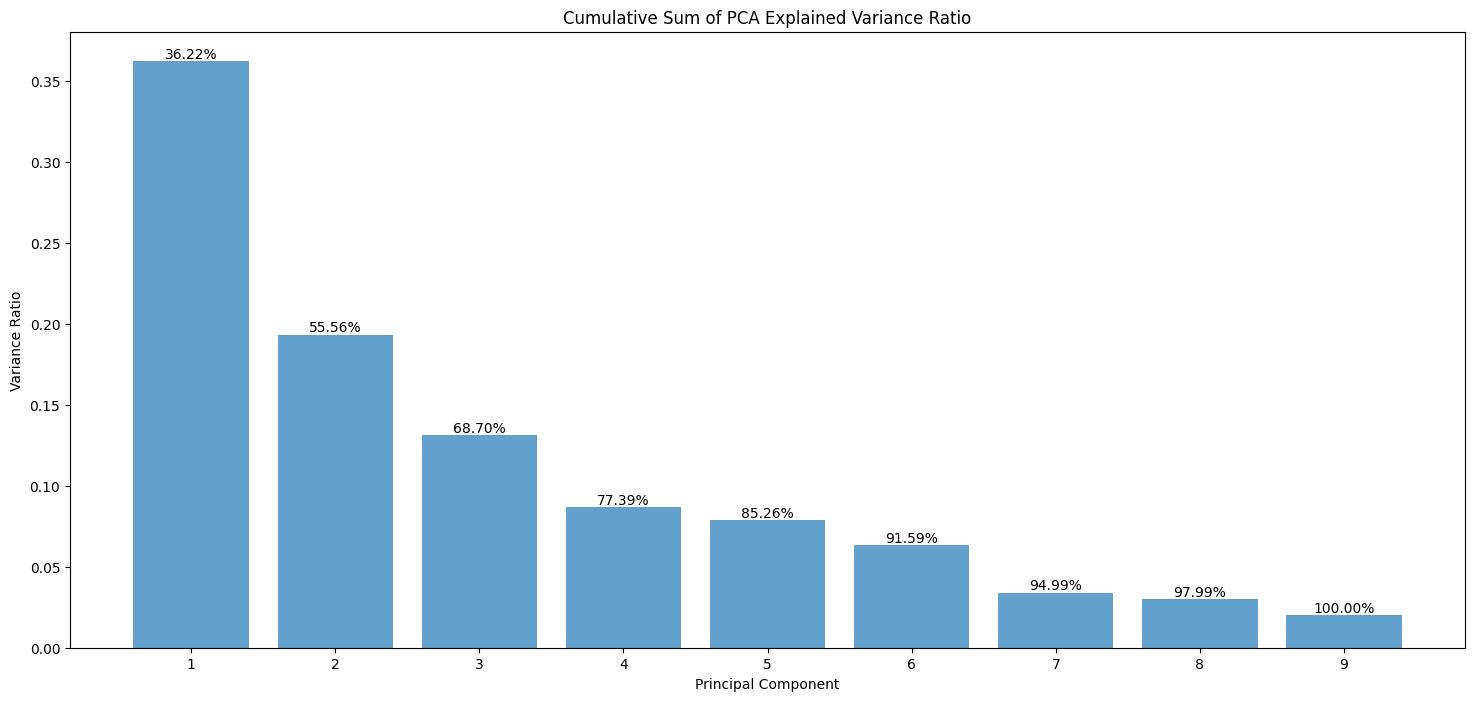

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming explained_variance contains the explained variance ratios from PCA
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plotting the explained variance
plt.figure(figsize=(18, 8))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')

# Annotating the bars with the cumulative explained variance percentage
for bar, cumulative in zip(bars, cumulative_variance):
    height = bar.get_height()
    plt.annotate(f'{cumulative:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 ha='center', va='bottom')

plt.ylabel('Variance Ratio')
plt.xlabel('Principal Component')
plt.title('Cumulative Sum of PCA Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()


##### **Explained Variance Plot Interpretation:**

1. The bar chart above shows the cumulative sum of the variance ratio captured by each principal component (PC). The first few PCs captured themost amount of variance, and as we move to higher-numbered PCs, the amount of variance captured decreases.

2. PC1 captures the most variance, followed by PC2, PC3, and so on.

**Summary:** PCA is a dimensionality reduction technique. By applying PCA we will reduce the number of independent variables from our dataset and also capture the 90% variance or information from the dataset. PCA helps to prevent overfitting of the model.

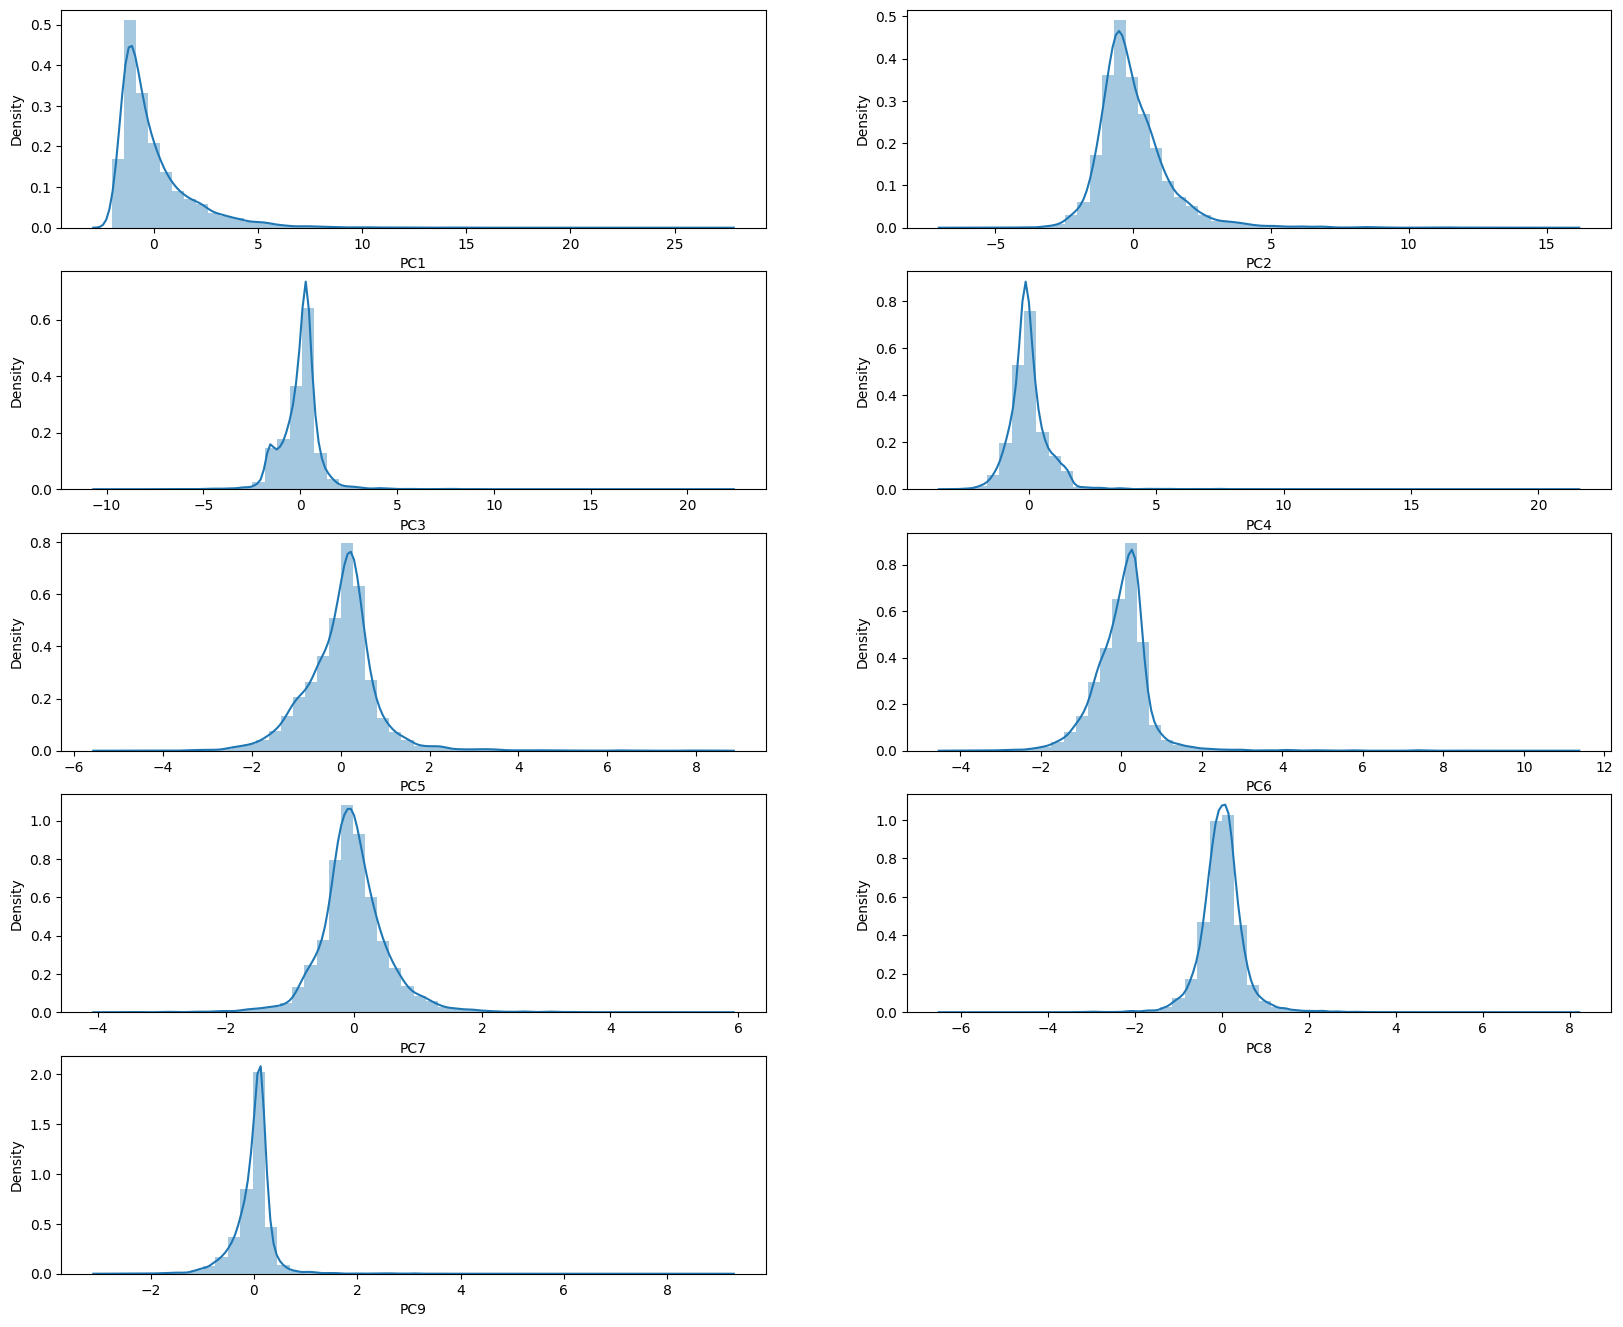

In [ ]:
# Distribution of PCA data

plt.figure(figsize = (20, 30))
for i, cols in enumerate(pca_df.columns):
   plt.subplot(9, 2, i+1)
   sns.distplot(pca_df[cols])
   plt.xlabel(cols)



**Summary:** After applying PCA we can conclude that data is pure normally distributed. There are no skewness left in the data.  




###**Model Selection, Training & Evaluation**

#### **Model Selection:**
For this case study, we will use the K-Means clustering algorithm, a popular unsupervised learning algorithm, to group the customers based on similar characteristics.

#### **Elbow method for finding the k-value - HyperParameter Turning**

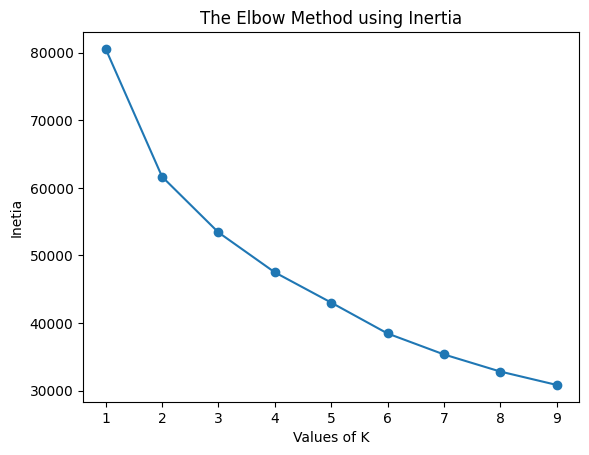

In [ ]:
inertia = []
k_range = range(1, 10)
for i in k_range:
  km = KMeans(n_clusters = i)
  km.fit_predict(pd.DataFrame(pca_df))
  inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker = "o")
plt.xlabel("Values of K")
plt.ylabel('Inetia')
plt.title("The Elbow Method using Inertia")
plt.show()

**Summary:**

*   Elbow method can help us to find the optimal number of clusters we can generate from the data. From the above plot we can observe there is a sudden drop of inertia at k = 3.
*   Using elbow method we can conclude the elbow has been formed at k = 3. Hence we will create 3 clusters to group the customers.



####**Model Training**

In [ ]:
# Train the model with 3 clusters
kmeans_model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 1000, random_state = 42)
kmeans_model.fit_predict(pca_df)
kmeans_df = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_model.labels_})], axis = 1)

**Summary**

*   We initialized the model with 3 clusters and fit the PCA data into the model. This approach will add cluster labels to the data.
*   Additionally we created a data frame by assign the cluster labels to the PCA data frame, to visualize the clusters formed.



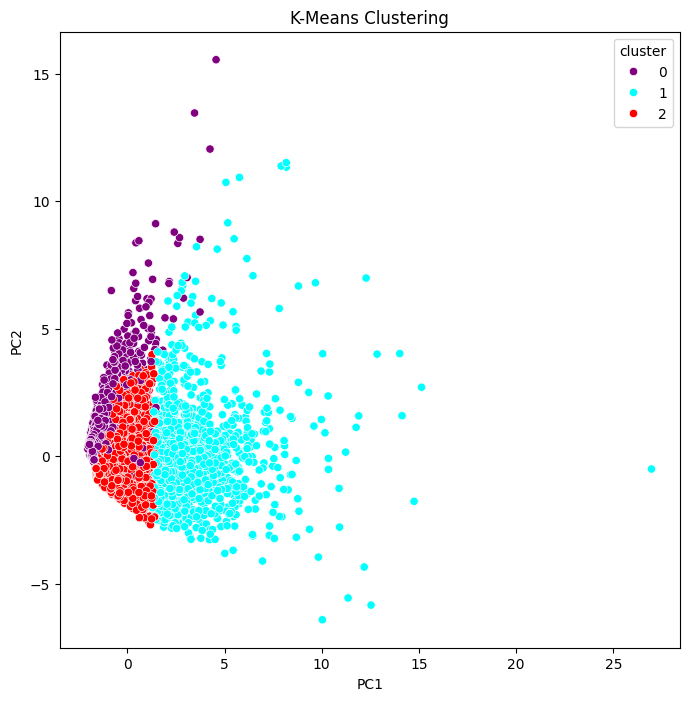

In [ ]:

plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'cluster', data = kmeans_df, palette = ['purple', 'cyan', 'red'])
plt.title("K-Means Clustering")
plt.show()

#####**Summary**: Using K-Means clustering technique we have created 3 distinct clusters. The data points corresponding to their clusters have similar characteristics. Hence they have been grouped together.

In [ ]:
# Check the dataframe after training
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,cluster
0,-1.461854,-0.823632,0.275247,-0.111716,0.282199,0.497258,-0.024474,0.108728,0.157296,2
1,2.217131,-0.012439,-0.673799,-0.071901,-1.043921,0.995019,-1.037170,0.743160,-0.475643,1
2,-0.337623,0.384043,0.855746,-0.948656,-0.478496,-0.166019,0.124123,0.069832,0.237832,2
3,-0.338047,-0.202944,0.545683,-0.926372,-0.670092,-0.227236,0.385885,0.161655,-0.016344,2
4,-1.229956,-0.705714,0.396691,-0.167009,0.191969,0.542990,-0.153542,-0.119136,0.250900,2


In [ ]:
# Create cluster center data frame
cluster_center_df = pd.DataFrame(data = kmeans_model.cluster_centers_, columns = [new_df.columns])
# Inverse transform the data
cluster_center_df = scaler.inverse_transform(cluster_center_df)
cluster_center_df = pd.DataFrame(data = cluster_center_df, columns = [new_df.columns])
cluster_center_df.head()

,BALANCE,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-814.116074,3961.375781,-0.104865,7.988621,1.339248,2814.777090,1344.293517,744.516900,0.155563
1,8388.010961,729.945108,0.144126,3.582170,10.648717,3783.639897,1474.235088,712.874643,0.141371
2,500.894771,329.916668,0.190004,2.043540,18.854658,5062.777864,1887.289566,900.260864,0.156221


**Summary:**
1. In this step we assigned column names to the centroid data point and created a data frame.
2. Then we have applied inverse scaling method to convert the centers back to the original data scale.


In [ ]:
# Assign cluster labels to the original data frame
new_cluster_df = pd.concat([new_df, pd.DataFrame({'Cluster' : kmeans_model.labels_})], axis = 1)
new_cluster_df.head()

,BALANCE,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Cluster
0,40.900749,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,2
1,3202.467416,6442.945483,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,1
2,2495.148862,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,2
3,1666.670542,205.788017,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,2
4,817.714335,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,2


In [ ]:
cluster_averages = new_cluster_df.groupby('Cluster').mean().reset_index()
cluster_averages

,Cluster,BALANCE,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,0,256.838150,73.924113,0.011343,0.218295,28.113652,5323.875869,2253.547320,213.355481,0.749576
1,1,4735.698751,4080.779813,0.437612,12.802076,16.714187,7935.331865,3995.095363,2386.348439,0.037116
2,2,1119.819789,454.882404,0.092515,1.693006,11.041405,3476.562307,1070.085103,627.807672,0.039669


**Summary**: Here we have applied mean function on the converted data frame to understand the behavior of each customer groups. By observing the average value of each column we can interpret the type of customer segments are available in the dataset.

####**Visualizations & Insights**

<Axes: xlabel='Cluster', ylabel='count'>

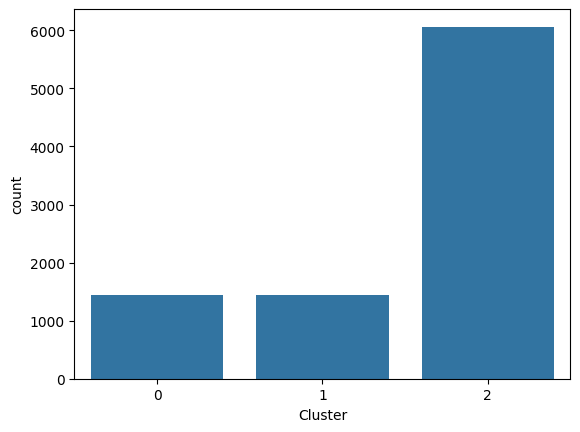

In [ ]:
# Count plot
sns.countplot(x = 'Cluster', data = new_cluster_df)

**Summary:** From the above plot we can observe the number of customers belong to cluster 2 is highest, followed by cluster 0.

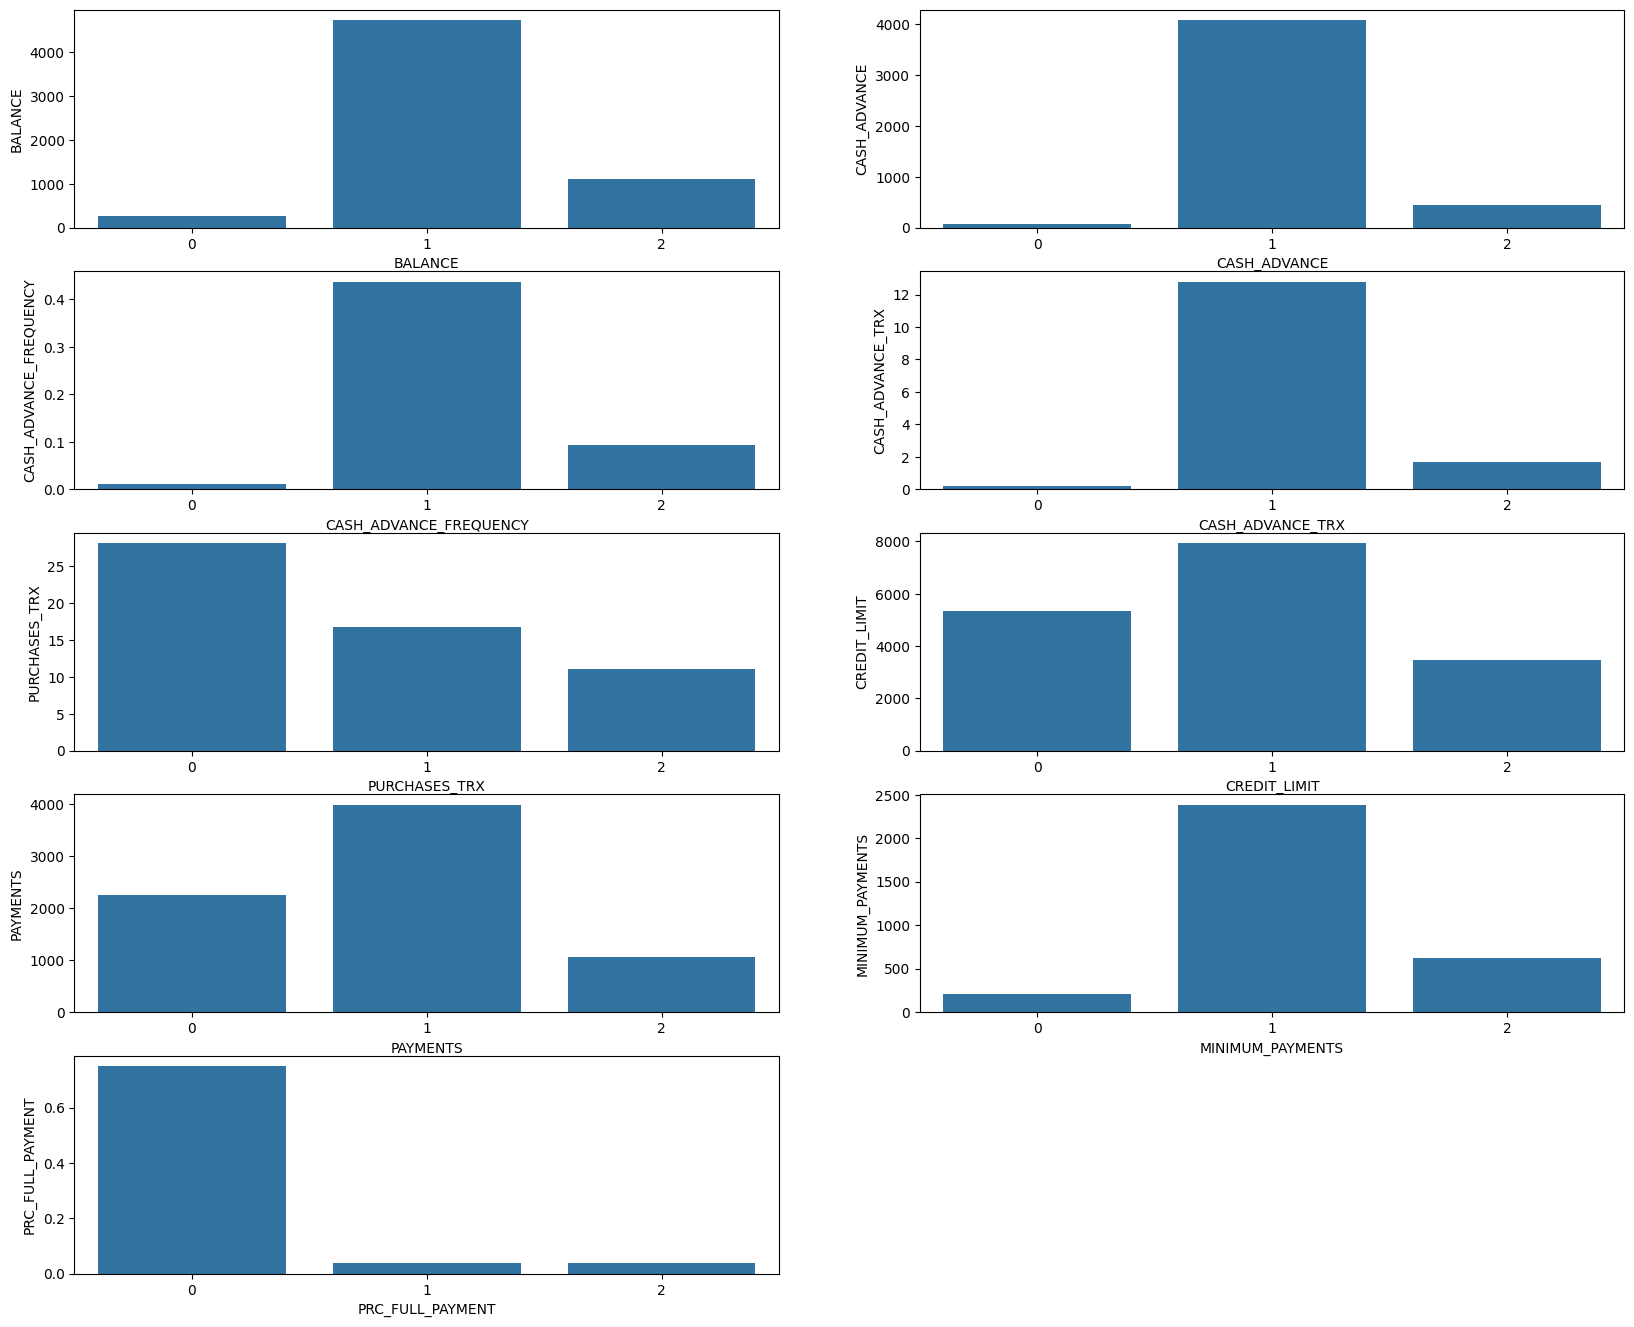

In [ ]:
# Visulaize the distribution of clusters based on each attribute
cluster_avg_df = cluster_averages.drop(['Cluster'], axis = 1)
plt.figure(figsize = (20, 30))
for i, cols in enumerate(cluster_avg_df.columns):
   plt.subplot(9, 2, i+1)
   sns.barplot(y = cluster_averages[cols], x = cluster_averages['Cluster'])
   plt.xlabel(cols)

**Summary:** In the bar plots, we've shown different traits of each cluster. It's clear that cluster 1 is the most profitable customer group. So, the bank should focus on creating special offers for these customers to attract them with better financial deals.

##### **Testing & Evaluation**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Drop the Null values if any
new_cluster_df.dropna(inplace = True)

X = new_cluster_df.drop(['Cluster'], axis = 1)
y = new_cluster_df[['Cluster']]

# Create train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Fit the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Create confusion matrix
confusion_metrics = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", confusion_metrics)

# Evaluate the metrices
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print("Precision of the model is:", f"{precision:.2f}")
print("Recall of the model is:",f"{recall:.2f}")
print("Accuracy of the model is:", f"{accuracy:.2f}")


Confusion Matrix: 
 [[ 284    4   10]
 [   1  254   27]
 [   7   19 1184]]
Precision of the model is: 0.95
Recall of the model is: 0.94
Accuracy of the model is: 0.96


**Summary:**

1. We created a Decision Tree classifier to evaluate the quality of our clusters by assessing evaluation metrics such as precision, recall, and accuracy.

2. We used a DataFrame containing cluster labels, treating the cluster column as the target variable and the other columns as predictor variables. If the Decision Tree model can accurately predict the cluster labels of the test data points, it indicates that each cluster is distinct, and the intra-cluster data points are very similar to each other. Consequently, the model can effectively identify which data point belongs to which cluster.

3. The Decision Tree model shows high evaluation metrics (precision, recall, accuracy), demonstrating that each cluster has distinct characteristics and is significantly different from the others. This confirms the effectiveness of our clustering.

In [ ]:

# Add the customer id column to the dataframe
customer_df = pd.concat([cluster_df["CUST_ID"],new_cluster_df], axis = 1)
customer_df.head()

,CUST_ID,BALANCE,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Cluster
0,C10001,40.900749,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,2
1,C10002,3202.467416,6442.945483,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,1
2,C10003,2495.148862,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,2
3,C10004,1666.670542,205.788017,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,2
4,C10005,817.714335,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,2


**Summary**: Here we have added the customer id in the processed data frame corresponding to each row. By using this data we can effectively identify customers and their corresponding group.

###**Interpretation & Recommendation for Marketing Strategies**

Based on the clustering analysis of credit card usage behavior, we have segmented customers into three distinct groups. Below are the relevant and actionable recommendations for marketing strategies aligned with the characteristics of each cluster:

###**Cluster 0: Low Balance, High Purchase Frequency**
1. BALANCE: 256.84

2. CASH_ADVANCE: 73.92

3. CASH_ADVANCE_FREQUENCY: 0.01

4. CASH_ADVANCE_TRX: 0.22

5. PURCHASES_TRX: 28.11

6. CREDIT_LIMIT: 5323.88

7. PAYMENTS: 2253.55

8. MINIMUM_PAYMENTS: 213.36

9. PRC_FULL_PAYMENT: 0.75

**Recommendations:**

1. **Upselling Savings Plans:** This cluster shows a high frequency of purchases and a good credit limit. Customers are actively using their credit cards for transactions. Upselling savings plans can be beneficial as they have the financial discipline to manage savings.

2. **Cross-Selling Small Loans:** Since their balance is low but purchase frequency is high, offering small, short-term loans can help in times of need without overwhelming them with high debt.

3. **Investment Products:** Introduce mutual funds or fixed deposits to encourage long-term financial growth.

4. **Credit Card Upgrades:** Offer cards with better rewards and cashback, given their high usage frequency.

**Alignment with Analysis:**

1. **High Purchase Frequency:** These customers are actively using their credit cards, indicating they are engaged and value financial tools. This makes them receptive to offers that can enhance their spending experience, such as credit card upgrades and investment products. Additionally the high purchase frequency and high percentage of full payments indicate that these customers are financially responsible and could be interested in savings plans to maximize their benefits.

2. **Low Balance:** Their low balance suggests they are managing their finances well and may be looking for ways to save and invest their money effectively, making savings plans and investment products highly relevant, and small loans might be more suitable as they might not require large amounts of credit.

###**Cluster 1: High Balance, High Cash Advance Usage**

1. BALANCE: 4735.70
2. CASH_ADVANCE: 4080.78
3. CASH_ADVANCE_FREQUENCY: 0.44
4. CASH_ADVANCE_TRX: 12.80
5. PURCHASES_TRX: 16.71
6. CREDIT_LIMIT: 7935.33
7. PAYMENTS: 3995.10
8. MINIMUM_PAYMENTS: 2386.35
9. PRC_FULL_PAYMENT: 0.04

**Recommendations:**

1. **Cross-Selling Larger Loans:** Customers in this cluster frequently use cash advances, indicating a need for quick access to cash. Offering larger personal or consolidation loans can help manage their cash flow needs more efficiently.

2. **Upselling Premium Savings Plans:** With a high balance and frequent cash advances, these customers might benefit from premium savings plans that offer better returns and additional benefits.

3. **Insurance Products:** Offer insurance plans to safeguard against potential financial risks.

4. **Debt Consolidation Services:** Help manage their cash flow needs more efficiently with consolidated debt.

**Alignment with Analysis:**

1. **High Balance and High Cash Advance Usage:** These customers have substantial balances and frequently use cash advances, indicating a need for accessible funds and potentially greater financial stability. The high balance and high cash advances suggest a need for liquid cash, making larger loans, and debt consolidation services might be an attractive option for managing finances.

2. **Frequent Cash Advances & high credit limit:** This behavior suggests a higher risk profile, making insurance products a relevant offer to mitigate financial risks. The high credit limit and substantial payments suggest that these customers have the capacity to handle larger financial products, making premium savings plans suitable.

###**Cluster 2: Moderate Balance, Moderate Usage**

1. BALANCE: 1119.82
2. CASH_ADVANCE: 454.88
3. CASH_ADVANCE_FREQUENCY: 0.09
4. CASH_ADVANCE_TRX: 1.69
5. PURCHASES_TRX: 11.04
6. CREDIT_LIMIT: 3476.56
7. PAYMENTS: 1070.09
8. MINIMUM_PAYMENTS: 627.81
9. PRC_FULL_PAYMENT: 0.04

**Recommendations:**

1. **Upselling Regular Savings Plans:** Customers in this cluster have a moderate balance and usage, making them suitable candidates for regular savings plans to encourage disciplined saving habits.

2. **Cross-Selling Medium Loans:** Offering medium-sized loans can cater to occasional needs for extra funds without putting too much strain on their finances.

3. **Retirement Plans:** Provide information on retirement plans for long-term financial security.

**Alignment with Analysis:**

1. **Moderate Balance and Usage:** These customers exhibit stable financial behavior, making them ideal candidates for consistent savings and investment products.

2. **Moderate Usage:** Their balanced approach to credit card use suggests they are likely to be receptive to medium-sized loans and retirement plans that support their long-term financial stability.

###**Conclusion**

By segmenting customers into these clusters, the financial institution can tailor its marketing strategies to meet the specific needs and behaviors of each group. This targeted approach can enhance customer satisfaction, loyalty, and profitability by offering the right financial products to the right customers.